# **ANALYSIS AND FORECASTING OF AUD/USD WITH OTHER MAJOR FOREX PAIRS** 


Forex Market is also called as Foreign exchange market and the volume traded during the market hour is higher than any other market therefore it is the largest market in the world.

Due to decentralized market, the volume we get from the broker is not a overall volume it is just a volume from the broker side.

The primary participant for this markets are Institutional traders, Banks, hedge funds.

![picture](https://drive.google.com/uc?export=view&id=1qFtA-8yrQ9jMkmWqIqTem2Dblj1ZFo9s)

<u>In this project I will be analysing:</u>
*  AUD/USD market with other major forex pair in the world, to see how does the AUD/USD is performing.

* I will also analyse which forex pair is performing better from past 10 years.

* correlation between AUD/USD and other major forex pairs

* Volume Analysis with strategy creation

* Analysing the strategy timings

* Checking the profitablity of the strategy over entire dataset.

* Predicting the AUD/USD using out-of-sample

![picture](https://drive.google.com/uc?export=view&id=1trIiq758k27wzclVFAR3HKRw_VW5hiuI)

<u>**Data Source**</u>

Data is collected from the Dukascopy data provider, and later some feature engineering is done to the original data by adding extra features.
here is the link for the data provider:
[Click here for the data](https://www.dukascopy.com/swiss/english/marketwatch/historical/)

To avoid confusion because of multiple dataset usage in each analysis, I am providing  the flowchart:

### ***DATA FLOW ARCHITECTURE***

![picture](https://drive.google.com/uc?export=view&id=1YBoo_BU_i4HPu_pbLDQtdsqPkbiHK7Fa)


### ***ANALYSIS PROCESS***

![picture](https://drive.google.com/uc?export=view&id=1g5IF83d7G405N9JBhHT3FJdv9QDhFo0s)

**Data Description**

The data starts from 2010-8-1 to  2020-8-3, total of 10 years data for 7 major currency in the world, and data has the following features,

Local time--> Date

'Open' --> market open price

Close-->market close price

High-->Highest price reached in that time

Low-->Lowest price reached in that time

Volume --> volume of the transaction

'rtLag1'  --> one day lag return

'rtLag2'  ---> two day lag return

'rtLag3' ----> three day lag return

'rtLag4' ---> fourth  day lag return

'rtLag5'---> fifth day lag return

'rtLag6'---> sixth day lag return

'rtLag7'---> seventh day lag return

'rtLag8'---> eigth day lag return

'rtLag9'---> 9th day lag return

'rtLag10'---> 10th day lag return

MA80, MA120, MA200 --> ROLLING MOVING AVERAGE FOR 80,120,200 time period

UPB and DOWB --> Upper and Lower bollinger band

Signal --> Classes of BULL or BEAR

(*Here, I have shown all the types of data to be used in analysis, therefore I will not be mentioning again in the analysis markdown and given flowchart should be easier rather than mentioning again and again in each anaslysis markdown*)

(*The property of the dataset is shown while in Analysis*)

In [1]:
#### IMPORTING LIBRARIES...


#Pandas used for data analysis and manipulation.
import pandas as pd

#Numpy is used for handling higher dimensional matrices(array)
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#statistcal libraries for time series analysis
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

#machine learning sklearn-libraries
from sklearn import preprocessing

# we are using knn classifier for prediction classes
from sklearn.neighbors import KNeighborsClassifier

#handling datetime
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **10years Forex pair Performance analysis**

In this section I will Analyse the performance of AUD/USD with other major currencies in the world from 10 years.

Aim of this analysis is to identify 
* which forex pair is performing better from past 10 years?

* How does AUD/USD is performing from past 10 years?

* How does AUD/USD is performing from  every year from 2010 to 2020?

* Return strength using ACF plot

In [2]:
##########################################################################################################################################################################
################################################################### DATA PREPARATION ####################################################################################
##########################################################################################################################################################################

#### IMPORTING DATASET

au_d = pd.read_csv("/content/AUD_10BB.csv")
eu_d =  pd.read_csv("/content/EUD_10.csv")
gu_d =  pd.read_csv("/content/GUD_10.csv")
nu_d =  pd.read_csv("/content/NUD_10.csv")
ucad_d = pd.read_csv("/content/USDCAD_10BB.csv")
uchf_d =  pd.read_csv("/content/USDCHF_10BB.csv")
ujd_d =  pd.read_csv("/content/UJD_10.csv")


### CALCULATING CUMULATIVE SUM OF 10 DAYS LAG RETURN
auc = au_d['rtLag10'].cumsum()
euc = eu_d['rtLag10'].cumsum()
guc = gu_d['rtLag10'].cumsum()
nuc = nu_d['rtLag10'].cumsum()
ucadc = ucad_d['rtLag10'].cumsum()
uchfc = uchf_d['rtLag10'].cumsum()
ujc = ujd_d['rtLag10'].cumsum()


### shape property of the dataset

print("The total rows of daily data: ", au_d.shape[0])
print("Total features of the daily data: ", au_d.shape[1])


The total rows of daily data:  3656
Total features of the daily data:  22


In [3]:
au_d

Unnamed: 0           Local time     Open  ...      M200       UPB     DOWNB
0              0  2010-08-01 02:30:00  0.90442  ...  0.000000  0.000000  0.000000
1              1  2010-08-02 02:30:00  0.90619  ...  0.000000  0.000000  0.000000
2              2  2010-08-03 02:30:00  0.91371  ...  0.000000  0.000000  0.000000
3              3  2010-08-04 02:30:00  0.91250  ...  0.000000  0.000000  0.000000
4              4  2010-08-05 02:30:00  0.91641  ...  0.000000  0.000000  0.000000
...          ...                  ...      ...  ...       ...       ...       ...
3651        3651  2020-07-30 02:30:00  0.71856  ...  0.661985  0.723360  0.696053
3652        3652  2020-07-31 02:30:00  0.71926  ...  0.662105  0.723298  0.698232
3653        3653  2020-08-01 02:30:00  0.71418  ...  0.662226  0.722721  0.700926
3654        3654  2020-08-02 02:30:00  0.71418  ...  0.662347  0.721337  0.704427
3655        3655  2020-08-03 02:30:00  0.71292  ...  0.662460  0.719375  0.707922

[3656 rows x 22 columns]

In [4]:
auc

0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
         ...   
3651   -2.01276
3652   -2.01127
3653   -2.01098
3654   -2.00653
3655   -2.00461
Name: rtLag10, Length: 3656, dtype: float64

In [5]:
### To have a clarity of Forex chart, plot candlestick chart for the daily data (sample = 100)


figohlc = go.Figure()

figohlc.add_trace(go.Candlestick(x = au_d['Local time'], open = au_d['Open'], high = au_d['High'], low = au_d['Low'], close = au_d['Close'], name = "AUD/USD Candlestcick"))

figohlc.add_traces(go.Scatter(x = au_d['Local time'][200:], y = au_d['M200'][200:], mode = 'lines', name = "Moving AVg 200"))   #use 200 because, while doing rolling MA all the values before to it is zero.

figohlc.update_layout(title = "AUD/USD Candlestcick chart for the Forex pair", title_x = 0.5)
figohlc.update_xaxes(title_text = "Date")
figohlc.update_yaxes(title_text = "Price")

figohlc.show()

#(ZOOM THE CANDLESTICK CHART FOR BETTER VIEW)


Now, we plot three charts

* 10 years close price movement

* 10 Years return 

* using bar plot to see the negative return and positive returns

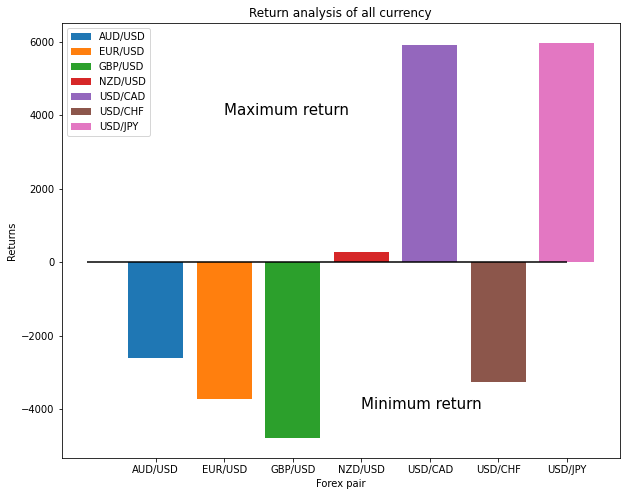

In [6]:
### PLOTTING THE CLOSE PRICE OF ALL DATA, TO CHECK THE PERFORMANCE

fig1 = make_subplots(specs = [[{"secondary_y": True}]])                          #  to have dual y axis we need to call secondary_y axis as True
fig1.add_trace(go.Scatter(mode = 'lines', x = au_d['Local time'], y =au_d['Close'], name = 'AUD/USD Return'), secondary_y = True)
fig1.add_trace(go.Scatter(mode = 'lines', x = eu_d['Local time'], y = eu_d['Close'], name = 'EUR/USD Return'), secondary_y = True)
fig1.add_trace(go.Scatter(mode='lines', x = gu_d['Local time'], y = gu_d['Close'], name = 'GBP/USD Return'), secondary_y = True)
fig1.add_trace(go.Scatter(mode='lines', x =  nu_d['Local time'], y = nu_d['Close'], name = 'NZD/USD Return'), secondary_y = True)
fig1.add_trace(go.Scatter(mode ='lines', x = ucad_d['Local time'], y = ucad_d['Close'], name = 'USD/CAD Return'), secondary_y = True)
fig1.add_trace(go.Scatter(mode='lines', x = uchf_d['Local time'], y = uchf_d['Close'], name = 'USD/CHF Return'), secondary_y = True)
fig1.add_trace(go.Scatter(mode='lines', x =  ujd_d['Local time'], y = ujd_d['Close'], name = 'USD/JPY Return'), secondary_y = False)
#PLOT UPDATING
fig1.update_layout( title_text = "10 years Forex Pair price movement", title_x = 0.4)
fig1.update_xaxes(title_text = "Year") 
fig1.update_yaxes(title_text = "Forex pair price", secondary_y=True)
fig1.update_yaxes(title_text = " USD/JPY", secondary_y=False)
#DISPLAYING THE PLOT
fig1.show()


### PLOTTING THE 10 DAYS LAG RETURN  OF ALL DATA, TO CHECK THE PERFORMANCE

fig2 = make_subplots(specs = [[{"secondary_y": True}]])                          #  to have dual y axis we need to call secondary_y axis as True
# CUMULATIVE RETURN PLOT OF ALL FOREX PAIR
fig2.add_trace(go.Scatter(mode = 'lines', x = au_d['Local time'], y =auc, name = 'AUD/USD Return'), secondary_y = True)
fig2.add_trace(go.Scatter(mode = 'lines', x = eu_d['Local time'], y = euc, name = 'EUR/USD Return'), secondary_y = True)
fig2.add_trace(go.Scatter(mode='lines', x = gu_d['Local time'], y = guc, name = 'GBP/USD Return'), secondary_y = True)
fig2.add_trace(go.Scatter(mode='lines', x =  nu_d['Local time'], y = nuc, name = 'NZD/USD Return'), secondary_y = True)
fig2.add_trace(go.Scatter(mode ='lines', x = ucad_d['Local time'], y = ucadc, name = 'USD/CAD Return'), secondary_y = True)
fig2.add_trace(go.Scatter(mode='lines', x = uchf_d['Local time'], y = uchfc, name = 'USD/CHF Return'), secondary_y = True)
fig2.add_trace(go.Scatter(mode='lines', x =  ujd_d['Local time'], y = ujc, name = 'USD/JPY Return'), secondary_y = False)
#PLOT UPDATING
fig2.update_layout( title_text = "10 years Forex Pair performance ", title_x = 0.4)
fig2.update_xaxes(title_text = "Year") 
fig2.update_yaxes(title_text = "Forex pair returns", secondary_y=True)
fig2.update_yaxes(title_text = " USD/JPY", secondary_y=False)
#DISPLAYING THE PLOT
fig2.show()

### PLOTTING BAR PLOT FOR THE RETURN ANALYSIS

plt.figure(figsize = (10,8))
plt.bar("AUD/USD",auc.sum(), label = "AUD/USD")
plt.bar("EUR/USD",euc.sum(),label = "EUR/USD")
plt.bar("GBP/USD",guc.sum(), label = "GBP/USD")
plt.bar("NZD/USD",nuc.sum(), label = "NZD/USD")
plt.bar("USD/CAD",ucadc.sum(), label = "USD/CAD")
plt.bar("USD/CHF",uchfc.sum(), label = "USD/CHF")
plt.bar("USD/JPY",ujc.sum()*0.01, label = "USD/JPY")
plt.hlines(y = 0, xmin = -1, xmax = "USD/JPY")
plt.text("EUR/USD", 4000, "Maximum return", fontsize =15)
plt.text("NZD/USD", -4000, "Minimum return", fontsize =15)
plt.title("Return analysis of all currency")
plt.xlabel("Forex pair")
plt.ylabel("Returns")
plt.legend()
plt.show()

From the above plots we can breakdown into following key points;

* We found that only two forex pairs are uptrend  and they are USD/CAD and USD/CHF

* All the forex pairs except USD/CAD and USD/CHF are in downtrend from 2015, where USD/CAD and USD/CHF prior to 2015 was in downtrend, therefore they are correlated.

* AUD/USD is not performing great comapred to other forex pair

In [7]:
years_ = ["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019","2020"]       # total dataset years


'''In this fucntion YearPerfo(), we can get the 
yearly performace of AUD/USD, USD/CAD, 
USD/JPY from its return and we plot that 
into barplot and line plot'''

def YearPerfo(X, years, startYear, endYear, s1):
  totals_ = []
  for l in range(len(years)):
    tot_ = X['rtLag10'][startYear:endYear].sum()
    totals_.append(tot_)
    startYear = endYear
    endYear = startYear + 366
### PLOT BARPLOT
  print("========================================================================================")
  plt.figure(figsize = (8,6))
  plt.bar(years, totals_, label = s1)
  plt.hlines(y = 0, xmin = "2010", xmax = "2020")
  plt.title("Yearly return of "+s1)
  plt.xlabel("Years")
  plt.ylabel("returns")
  plt.legend()
  plt.show()
### PLOT LINE PLOT
  plt.figure(figsize = (8,6))
  plt.plot(years, totals_, label = s1)
  plt.title("Yearly return of "+s1)
  plt.xlabel("Years")
  plt.ylabel("returns")
  plt.legend()

  plt.show()
  print("============================================================================================")
  return

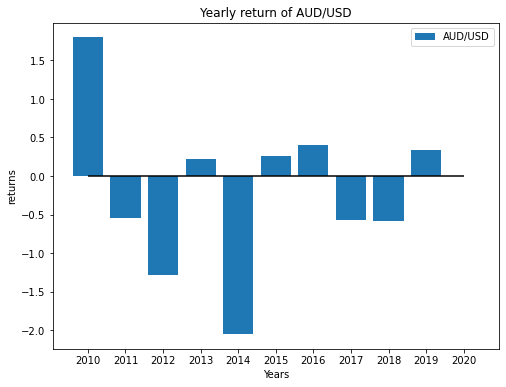

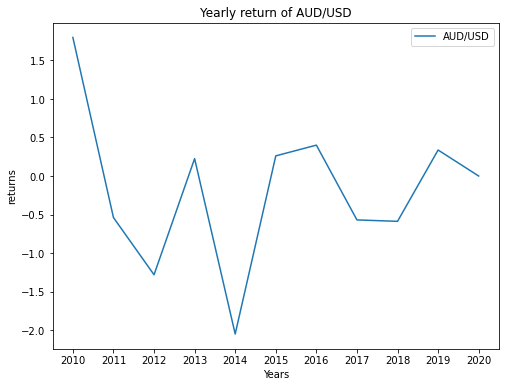

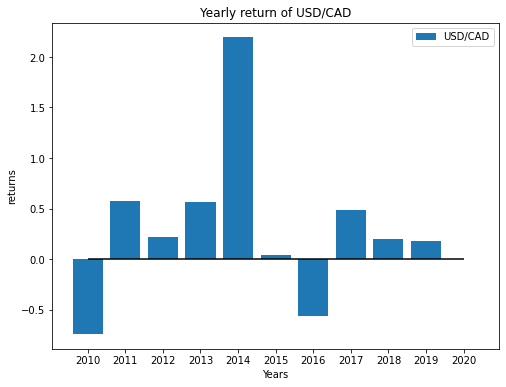

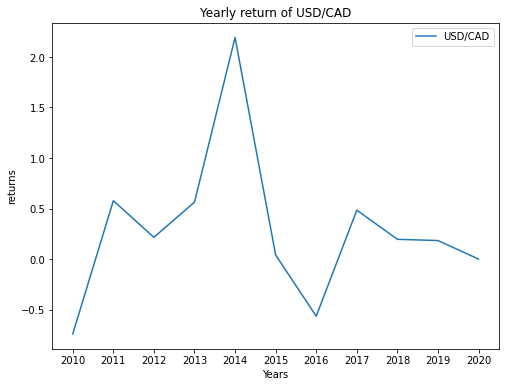

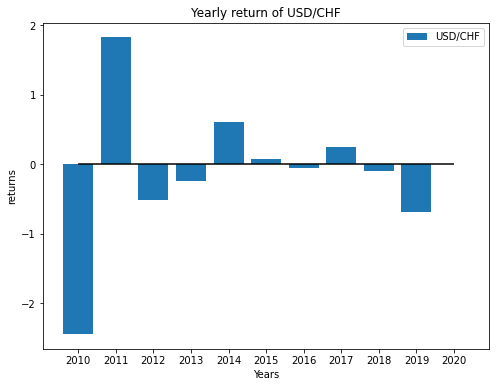

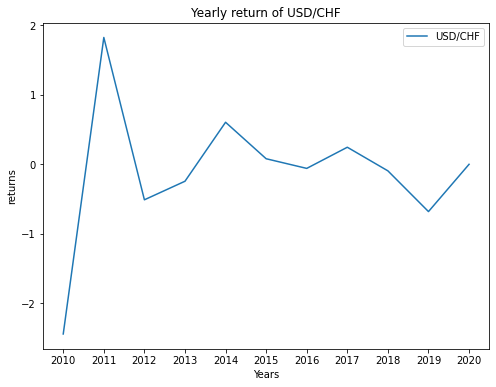

In [8]:
### CALLING THE YearPerfo() TO ANALYSE THE PERFORMACE OF AUD/USD, USD/CAD, USD/CHF

YearPerfo(au_d, years_, 0, 366, "AUD/USD")
YearPerfo(ucad_d, years_, 0, 366, "USD/CAD")
YearPerfo(uchf_d, years_, 0, 366, "USD/CHF")

From the plots we can see that 

* AUD/USD is not performing well on 2014, however, now the forex pair is getting better and its uptrending slowly.

* Comparing all  the pairs USD/CAD is better than all the pairs, however while comaparing AUD/USD, we have USD/CAD and USD/CHF  has a better performance and better return

In [9]:
'''IN this function we will see that price movement of all three pairs using Bollinger Bands, which is one of the technical analysis indicator
and we can see how does close price is moving with Bollinger bands'''

def PriceMovement(X, s1):

  fig = go.Figure()

  fig.add_trace(go.Scatter(x = X['Local time'][13:], y = X['Close'][13:], name = 'Close'))

### CLose value standard deviation with 2sigma distance, close + 2sigma
  fig.add_trace(go.Scatter(x = X['Local time'][13:], y = X['UPB'][13:], name = 'UPB'))
### CLose value standard deviation with 2sigma distance, close - 2sigma
  fig.add_trace(go.Scatter(x = X['Local time'][13:], y = X['DOWNB'][13:], name = 'DOWNB'))
### here we get the direction in the form of channel, so that we cam see that how doe the price is moving
  fig.update_traces(mode = 'lines')
  fig.update_layout(title = "Price Movement of "+s1, title_x = 0.4)
  fig.update_xaxes(title_text = "Days")
  fig.update_yaxes(title_text = "Price")
  fig.show()
  return 

In [10]:
### Calling the price movemet plotter
PriceMovement(au_d, "AUD/USD")
PriceMovement(ucad_d,  "USD/CAD")
PriceMovement(uchf_d,  "USD/CHF")

In these plot we can see that the close prices are moving along the channel, and we can say that it is following similar to normal distribution, where 
 90% of the values comes between $(\mu +2*\sigma)$ to $(\mu - 2*\sigma)$ and the values outward these range are calos called as outlier in data science."

### **Return stregth Analysis for AUD/USD**

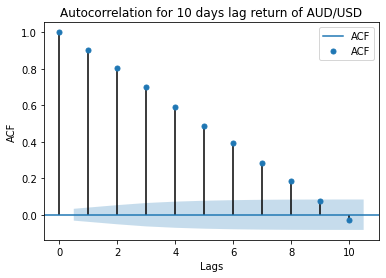

In [11]:
plot_acf(x = np.array(au_d['rtLag10']).squeeze(), lags = 10, label = "ACF")
plt.title("Autocorrelation for 10 days lag return of AUD/USD")
plt.xlabel("Lags")
plt.ylabel("ACF")
plt.legend()
plt.show();

In this plot we get to know that how does the values within the values are correlated to each other.
for Lag = 1, we know that it above 90% correlated, Lag  =2, 90% correlated, however, Lag = 8 is 20% correlated and Lag = 10 is negatively correlated, therefore we can say that if we want to calculate next return value then its better to use Lag that has highly correlated and using Lag  =10 will not predict correctly.

# **Correlation Analysis**

In this Correlation Analysis, we will check the correlation between AUD/USD and other major currency in the world.

With correlation we can identify the movements of the market, and it is also seen that these strtergies has been used in trading.

Using correlation it would be easier to see if the market has similar type of direction or not.

We will use two types of dataset, thst is hourly data and weekly data.

Analaysis for both is done seperately.


In [13]:

###IMPORT DATA


##HOURLY DATA
au_h = pd.read_csv("/content/AU_H.csv")
eu_h = pd.read_csv("/content/EU_H.csv")
gu_h = pd.read_csv("/content/GU_H.csv")
nu_h = pd.read_csv("/content/NU_H.csv")
ucad_h = pd.read_csv("/content/UCAD_H.csv")
uchf_h = pd.read_csv("/content/UCHF_H.csv")
uj_h = pd.read_csv("/content/UJ_H.csv")

##WEEKLY DATA
au_w = pd.read_csv("/content/AUW_10.csv").fillna(0)
eu_w = pd.read_csv("/content/EUW_10.csv").fillna(0)
gu_w = pd.read_csv("/content/GUW_10.csv").fillna(0)
nu_w = pd.read_csv("/content/NUW_10.csv").fillna(0)
ucad_w = pd.read_csv("/content/UCADW_10.csv").fillna(0)
uchf_w = pd.read_csv("/content/UCHFW_10.csv").fillna(0)
uj_w = pd.read_csv("/content/UJW_10.csv").fillna(0)



### shape property of the dataset

print("The total rows of hourly data: ", au_h.shape[0])
print("Total features of the hourly data: ", au_h.shape[1])


print("The total rows of weekly data: ", au_w.shape[0])
print("Total features of the weekly data: ", au_w.shape[1])

The total rows of hourly data:  1537
Total features of the hourly data:  12
The total rows of weekly data:  524
Total features of the weekly data:  16


In [14]:

### ALL FOREX PAIR HOURLY CLOSE DATA

all_hour = {'Local time': au_h['Local time'], 'AUD/USD': au_h['Close'], 'EUR/USD': eu_h['Close'], 'GBP/USD' : gu_h['Close'], 'NZD/USD': nu_h['Close'], 'USD/CAD': ucad_h['Close'], 'USD/CHF': uchf_h['Close'], 'USD/JPY': uj_h['Close']}

### ALL FOREX PAIR WEEKLY CLOSE DATA

all_weekly = {'Local time': au_w['Local time'],'AUD/USD': au_w['Close'], 'EUR/USD': eu_w['Close'], 'GBP/USD' : gu_w['Close'], 'NZD/USD': nu_w['Close'], 'USD/CAD': ucad_w['Close'], 'USD/CHF': uchf_w['Close'], 'USD/JPY': uj_w['Close']}


In [15]:
### DATA INTO DATAFRAME FORMAT

Analysis_hour = pd.DataFrame(all_hour)
Analysis_week = pd.DataFrame(all_weekly)

### DATE TIME PROCESSOR
def DayTimeProcessor (dataset):
  dataset['Local time'] = dataset['Local time'].apply(lambda x:x[:-13])                              
  dataset['Local time'] = dataset['Local time'].apply(lambda x: dt.datetime.strptime(x, "%d.%m.%Y %H:%M:%S"))   
  return (dataset)

Analysis_hour = DayTimeProcessor(Analysis_hour)

In [16]:
Analysis_week

Local time  AUD/USD  EUR/USD  ...  USD/CAD  USD/CHF  USD/JPY
0    2010-07-26 02:30:00  0.90442  1.30487  ...  1.02838  1.04082   86.457
1    2010-08-02 02:30:00  0.91884  1.32753  ...  1.02715  1.03890   85.495
2    2010-08-09 02:30:00  0.89222  1.27495  ...  1.04160  1.05080   86.180
3    2010-08-16 02:30:00  0.89215  1.27075  ...  1.04730  1.03385   85.605
4    2010-08-23 02:30:00  0.89888  1.27595  ...  1.05075  1.02780   85.215
..                   ...      ...      ...  ...      ...      ...      ...
519  2020-07-06 02:30:00  0.69479  1.12990  ...  1.35918  0.94105  106.917
520  2020-07-13 02:30:00  0.69936  1.14269  ...  1.35780  0.93845  107.018
521  2020-07-20 02:30:00  0.71040  1.16546  ...  1.34141  0.92039  106.123
522  2020-07-27 02:30:00  0.71418  1.17753  ...  1.34097  0.91307  105.819
523  2020-08-03 02:30:00  0.71558  1.17862  ...  1.33819  0.91220  105.911

[524 rows x 8 columns]

## **Hourly correlation Analysis**

Here we will find the correlation between the AUD/USD and other Major currencies in the world for the hourly data.

later we will find the best two positive and negative correlated market and we wiil see how they move along with the price.

**Primary Question for this section is:**

What is the two best currency that AUD/USD is correlated ? (both positive and negative)

In [17]:
#### Correlation for the Hourly Data is:

hourly_corr = Analysis_hour.corr()
hourly_corr

AUD/USD   EUR/USD   GBP/USD   NZD/USD   USD/CAD   USD/CHF   USD/JPY
AUD/USD  1.000000  0.935611  0.869377  0.940338 -0.821975 -0.840633 -0.529726
EUR/USD  0.935611  1.000000  0.898000  0.844683 -0.732374 -0.922279 -0.691802
GBP/USD  0.869377  0.898000  1.000000  0.765975 -0.831916 -0.753814 -0.491900
NZD/USD  0.940338  0.844683  0.765975  1.000000 -0.709866 -0.817476 -0.520483
USD/CAD -0.821975 -0.732374 -0.831916 -0.709866  1.000000  0.522815  0.230072
USD/CHF -0.840633 -0.922279 -0.753814 -0.817476  0.522815  1.000000  0.851398
USD/JPY -0.529726 -0.691802 -0.491900 -0.520483  0.230072  0.851398  1.000000

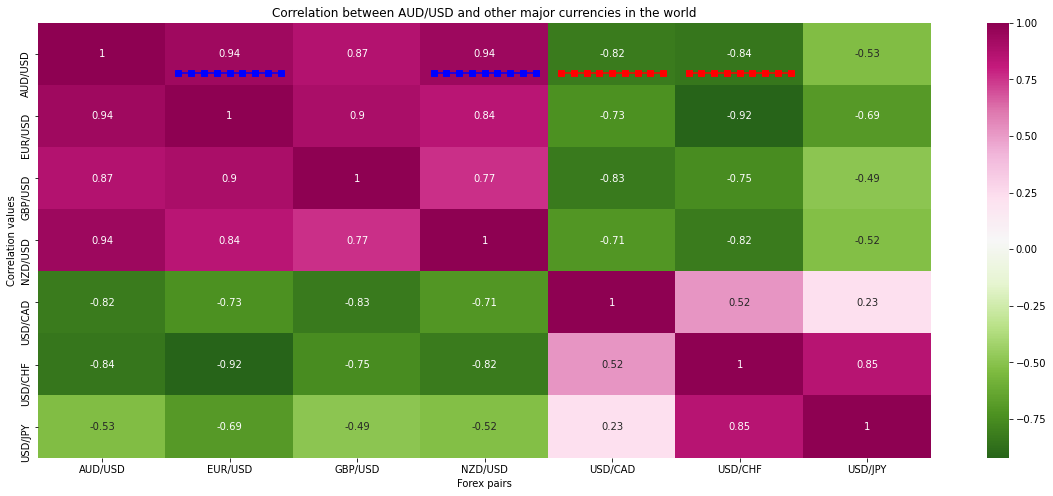

In [18]:
plt.figure(figsize = (20, 8))

### PLOT THE HEATMAP FOR CORRELATION
sns.heatmap(Analysis_hour.corr(), annot=True, cmap = "PiYG_r")
plt.plot([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9], [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8], marker = 's', color = 'b')
plt.plot([3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9], [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8], marker = 's', color = 'b')
plt.plot([4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8], marker = 's', color = 'r')
plt.plot([5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9], [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8], marker = 's', color = 'r')
plt.title("Correlation between AUD/USD and other major currencies in the world")
plt.xlabel("Forex pairs")
plt.ylabel("Correlation values")
plt.show()

From the above heatmap we can see four values are indicated colors, the blue color represents AUD/USD is highly positively correlated with EUR/USD and NZD/USD and red color represents that AUD/USD is highly negative correlated with USD/CAD and USD/CHF.

Here, AUD/USD is 94% correlated with EUR/USD and NZD/USD and 82% negatively correlated with USD/CAD and 84% negative correlated with USD/CHF.

Now we will analyse How does these pairs move with AUD/USD.

In [19]:
'''Creatting a function is very usefull in this scenario because we have to use the same plotting configarations again and again, so by creating function I will be calling the fucntion
  with required parameters for the plot and all the rest of the fixed parameters will be in the functions
  
  A_y1 = AUD/USD DATA
  pn1 = AUD/USD CLOSE LABEL
  A_y2 = Corresponding forex pair data
  pn2 = Corresponding forex pair label
  A_x =  X axis data
  
  This fucntion is used for both hourly and weekly analysis'''
  
  
def CorrelatedPLot(A_y2, pn1, pn2, A_x, A_y1):
  
  
    fig1 = make_subplots(specs = [[{"secondary_y": True}]])                          #  to have dual y axis we need to call secondary_y axis as True

    # AUD/USD CLOSE PLOT
    fig1.add_trace(go.Scatter(mode = 'lines', x = A_x, y = A_y1, name = pn1), secondary_y = False)
    #COMPARING FOREX PAIR
    fig1.add_trace(go.Scatter(mode = 'lines', x = A_x, y = A_y2, name = pn2), secondary_y = True)
    #PLOT UPDATING
    fig1.update_layout( title_text = "Correlated  Forex pair movememt", title_x = 0.4 , legend = dict(yanchor = "top", y = 0.99, xanchor = 'right'))
    fig1.update_xaxes(title_text = "Date") 
    fig1.update_yaxes(title_text = pn2, secondary_y=True)
    fig1.update_yaxes(title_text = pn1, secondary_y=False)

    fig1.show()

    return 

In [20]:
CorrelatedPLot(A_y2 =  Analysis_hour["EUR/USD"], pn2 = "EUR/USD Close", A_y1 =  Analysis_hour['AUD/USD'], pn1 = "AUD/USD Close", A_x = Analysis_hour['Local time'])

In [21]:
CorrelatedPLot(A_y2 =  Analysis_hour["NZD/USD"], pn2 = "NZD/USD Close", A_y1 =  Analysis_hour['AUD/USD'], pn1 = "AUD/USD Close", A_x = Analysis_hour['Local time'])

In [22]:
CorrelatedPLot(A_y2 =  Analysis_hour["USD/CAD"], pn2 = "USD/CAD Close", A_y1 =  Analysis_hour['AUD/USD'], pn1 = "AUD/USD Close", A_x = Analysis_hour['Local time'])

In [23]:
CorrelatedPLot(A_y2 =  Analysis_hour["USD/CHF"], pn2 = "USD/CHF Close", A_y1 =  Analysis_hour['AUD/USD'], pn1 = "AUD/USD Close", A_x = Analysis_hour['Local time'])

**Analysis**

From the following above four plots:

<u>*Positively correlated plots*</u>

1) AUD/USD vs EUR/USD

2) AUD/USD vs NZD/USD

We can see that;
 
AUD/USD and EUR/USD moving in same directions as uptrend and therefore they are correlated in price movement.

AUD/USD and NZD/USD moving in same directions and they are very closer to each other comapred to EUR/USD plot, as uptrend and therefore they are correlated in price movement.

<u>*Negatively correlated plots*</u>

1) AUD/USD vs USD/CAD

2) AUD/USD vs USD/CHF


We can see that;

AUD/USD and USD/CAD are highly negatively correlated and the direction of price is also very much opposite to each other , that is, if the AUD/USD is uptrend, then corresponding USD/CAD is downtrend, and there is alos much noise in the data therefore they are negatively correlated with each other.

AUD/USD and USD/CHF are highly negatively correlated and the direction of price is also very much opposite to each other , that is, if the AUD/USD is uptrend, then corresponding USD/CHFis downtrend, and there isnot much noise in the data, therefore they are negatively correlated with each other.

## **Weekly correlation Analysis**

Here we will find the correlation between the AUD/USD and other Major currencies in the world for the weekly data.

later we will find the best two positive and negative correlated market and we wiil see how they move along with the price.

**Primary Question for this section is:**

What is the two best currency that AUD/USD is correlated ? (both positive and negative)

In [24]:
#### Correlation for the Weekly Data is:

Weekly_corr = Analysis_week.corr()
Weekly_corr

AUD/USD   EUR/USD   GBP/USD   NZD/USD   USD/CAD   USD/CHF   USD/JPY
AUD/USD  1.000000  0.883352  0.802258  0.879911 -0.973249 -0.642693 -0.847187
EUR/USD  0.883352  1.000000  0.806020  0.827186 -0.911703 -0.747988 -0.755632
GBP/USD  0.802258  0.806020  1.000000  0.799666 -0.833820 -0.660576 -0.521453
NZD/USD  0.879911  0.827186  0.799666  1.000000 -0.862010 -0.701309 -0.598422
USD/CAD -0.973249 -0.911703 -0.833820 -0.862010  1.000000  0.637532  0.825869
USD/CHF -0.642693 -0.747988 -0.660576 -0.701309  0.637532  1.000000  0.496829
USD/JPY -0.847187 -0.755632 -0.521453 -0.598422  0.825869  0.496829  1.000000

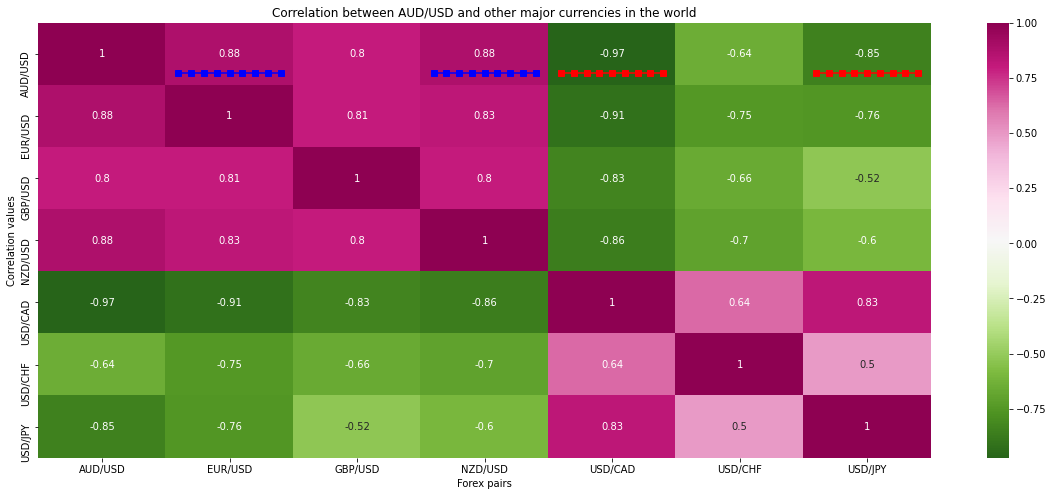

In [25]:
plt.figure(figsize = (20, 8))

### PLOT THE HEATMAP FOR CORRELATION
sns.heatmap(Analysis_week.corr(), annot=True, cmap = "PiYG_r")
plt.plot([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9], [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8], marker = 's', color = 'b')
plt.plot([3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9], [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8], marker = 's', color = 'b')
plt.plot([4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8], marker = 's', color = 'r')
plt.plot([6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9], [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8], marker = 's', color = 'r')
plt.title("Correlation between AUD/USD and other major currencies in the world")
plt.xlabel("Forex pairs")
plt.ylabel("Correlation values")
plt.show()

From the above heatmap we can see four values are indicated with colors, the blue color represents AUD/USD is highly positively correlated with EUR/USD and NZD/USD and red color represents that AUD/USD is highly negative correlated with USD/CAD and USD/JPY.

Here, AUD/USD is 88% correlated with EUR/USD and NZD/USD and 97% negatively correlated with USD/CAD and 85% negative correlated with USD/JPY.

Now we will analyse How does these pairs move with AUD/USD.

In [26]:
CorrelatedPLot(A_y2 =  Analysis_week["EUR/USD"], pn2 = "EUR/USD Close", A_y1 =  Analysis_week['AUD/USD'], pn1 = "AUD/USD Close", A_x = Analysis_week['Local time'])

In [27]:
CorrelatedPLot(A_y2 =  Analysis_week["NZD/USD"], pn2 = "NZD/USD Close", A_y1 =  Analysis_week['AUD/USD'], pn1 = "AUD/USD Close", A_x = Analysis_week['Local time'])

In [28]:
CorrelatedPLot(A_y2 =  Analysis_week["USD/CAD"], pn2 = "USD/CAD Close", A_y1 =  Analysis_week['AUD/USD'], pn1 = "AUD/USD Close", A_x = Analysis_week['Local time'])

In [29]:
CorrelatedPLot(A_y2 =  Analysis_week["USD/JPY"], pn2 = "USD/JPY Close", A_y1 =  Analysis_week['AUD/USD'], pn1 = "AUD/USD Close", A_x = Analysis_week['Local time'])

**Analysis**

From the following above four plots:

<u>*Positively correlated plots*</u>

1) AUD/USD vs EUR/USD

2) AUD/USD vs NZD/USD

We can see that;
 
AUD/USD and EUR/USD moving in same directions as downtrend and therefore they are correlated in price movement.

AUD/USD and NZD/USD moving in same directions and they are very closer to each other comapred to EUR/USD plot, as downtrend and therefore they are correlated in price movement.

<u>*Negatively correlated plots*</u>

1) AUD/USD vs USD/CAD

2) AUD/USD vs USD/JPY


We can see that;

AUD/USD and USD/CAD are highly negatively correlated and the direction of price is also very much opposite to each other , that is, if the AUD/USD is downtrend, then corresponding USD/CAD is uptrend, and there isnot much noise in the data while compared to houlry data thus, they are negatively correlated with each other.

AUD/USD and USD/JPY are highly negatively correlated and the direction of price is also very much opposite to each other , that is, if the AUD/USD is downtrend, then corresponding USD/JPY is uptrend, and there is not much noise in the data, therefore they are negatively correlated with each other.



































## ***VOLUME AND TIMING ANALYSIS***

The primary focus/ main question in this section of analysis is finding the best time for trading AUD/USD using 1H time frame data of past 3 months from 2020-05-31 to 2020-08-03.

If someone asks me, ***What is the best time for trading AUD/USD***, I would say to trade during active trading hour because during active trading there is a volatility in the market.

Now the question again raises with ***at what time in a day is active hours for AUD/USD***

Therefore, to answer this question I am going to use *Volume data* of the forex for the 1H time frame chart from 2020-05-31 to 2020-08-03.

#### ***Volume Data*** 

<u>Volume data gives us important information such as:</u>

 * The total amount of asset or security exchnaged for the give time period, in simple terms its a amount money that is flowing either for *BULL* or *BEAR*.

 * Therefore it is advisable to place trade during uni-directional trend because volume flown  during this is greater compared to other time.

## ***TIMING ANALYSIS***


![picture](https://drive.google.com/uc?export=view&id=1SJkuwLez6hN_t7RzNg8ZOHb5kGZDtN6X)

Forex Market is open for a 24hr, 5 days in a week and it is the most volume flow market. First session  for a Forex begins with Sydney and followed by Tokyo, however, it is said that diring these market open the volatility is not much higher compared to London and New York session. 

Therefore we will check at which session does the AUD/USD will give us better trades than sitting just for 24hr looking at the computer screen to show up the patterns.

![picture](https://drive.google.com/uc?export=view&id=1waZ6ebBzYfVZcSZkE1FuoU0eF0xRLWbJ)

Therefore Analysisng the active sessions of AUD/USD is important, unless if you want to sit straight for 24hr looking at the screen to show up the patterns.

In [30]:

#### IMPORTING LIBRARIES....

### Importing pandas for data ananlysis and data manipulation
import pandas as pd

### Importing Numpy for Higher order matrix operation such as arrays.
import numpy as np

### Importing datetime for converting into actual datetime format.
import datetime as dt

### Importing visualization libraries...

import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [31]:


########################################################################################################################################################################
################################################################## ||  DATA PREPARATION ||  ############################################################################
########################################################################################################################################################################


print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("Log:1 Data Imporitng and Data Preparation started...")

#### IMPORTING DATASETS.....

data_AU = pd.read_csv("/content/AU_H.csv")


# VOLUME DATA FOR THE ANALYSIS...


all_Volume = {'Date' : data_AU['Local time'], 'AUD/USD' : data_AU['Volume']}

Volume_Data = pd.DataFrame(data = all_Volume)


### CLOSE PRICE DATA FOR THE ANALYSIS...


all_Close = {'Date' : data_AU['Local time'], 'AUD/USD' : data_AU['Close']}

Close_Data = pd.DataFrame(data = all_Close)


### HIGH PRICE FOR THE DATA ANALYSIS...


all_High = {'Date' : data_AU['Local time'], 'AUD/USD' : data_AU['High']}


High_Data = pd.DataFrame(data = all_High)


#--------------------------------------------------------------
# DATETIME PROCESSING FUNCTION FROM STRING TO DATETIME
#--------------------------------------------------------------
def DayTimeProcessor(dataset):
  dataset['Date'] = dataset['Date'].apply(lambda x:x[:-13])                                          # Removes the .000 GMT+0530 from data
  dataset['Date'] = dataset['Date'].apply(lambda x: dt.datetime.strptime(x, "%d.%m.%Y %H:%M:%S"))    # converts the data time in timestamp
  return (dataset)
#-------------------------------------------------------------


# CALLING THE DATETIME PROCESSING FUNCTION FOR PROCESSING THE DATASET:

Volume_Data = DayTimeProcessor(Volume_Data)

Close_Data = DayTimeProcessor(Close_Data)

High_Data =  DayTimeProcessor(High_Data)


# SETTING THE INDEX AS LOCAL TIME OF THE  DATASET...

Volume_Data = Volume_Data.set_index('Date')

Close_Data = Close_Data.set_index('Date')

High_Data = High_Data.set_index('Date')


# ANALYSING NUMBE ROF TIMES THERE WAS NO TRADING DAYS, IN GERNERAL WHEN THERE IS NO TRADING DAYS, THE VOLUME IS EQUAL TO ZERO.

Xzero = Volume_Data[Volume_Data['AUD/USD']==0].index                              # FINDING THE INDEX WHERE THE VOLUME IS ZERO
VolZero = Volume_Data['AUD/USD'].max()                                            # FINDING THE MAXIMUM VOLUME IN DATASET FOR PLOTTING.

print("Log:1 Data Imporitng and Data Preparation ended...")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Log:1 Data Imporitng and Data Preparation started...
Log:1 Data Imporitng and Data Preparation ended...
-------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [32]:
### Describing the dataset

print("Total samples in the original dataset: ", data_AU.shape[0])
print("Total features in the original dataset: ", data_AU.shape[1])


print("Total samples in the extracted dataset: ", Volume_Data.shape[0])
print("Total features in the extracted dataset: ", Volume_Data.shape[1])


print("Original data:  ")
print(data_AU.head(5))

print("Extracted data:  ")
print(Volume_Data.head(5))

Total samples in the original dataset:  1537
Total features in the original dataset:  12
Total samples in the extracted dataset:  1537
Total features in the extracted dataset:  1
Original data:  
                         Local time     Open     High  ...  rtLag4  rtLag5  Signal
0  31.05.2020 23:30:00.000 GMT+0530  0.66650  0.66650  ...       0       0    BEAR
1  01.06.2020 00:30:00.000 GMT+0530  0.66650  0.66650  ...       0       0    BEAR
2  01.06.2020 01:30:00.000 GMT+0530  0.66650  0.66650  ...       0       0    BEAR
3  01.06.2020 02:30:00.000 GMT+0530  0.66570  0.66687  ...       0       0    BULL
4  01.06.2020 03:30:00.000 GMT+0530  0.66631  0.66635  ...       0       0    BEAR

[5 rows x 12 columns]
Extracted data:  
                     AUD/USD
Date                        
2020-05-31 23:30:00     0.00
2020-06-01 00:30:00     0.00
2020-06-01 01:30:00     0.00
2020-06-01 02:30:00   738.79
2020-06-01 03:30:00  3431.98


***In the Volume Analysis from now I will do the follwing Analysis by answering these primary questiosn:***

1) Defining the big picture(overview) of volume analysis

2) Finding one of the suitale time based entry method

3) Giving examples for the found stratergy

4) Testing the stratergy for overall data

5) Analysing the results from the test

6) Concluding the best method for the entry.

#### **(1) difining the Big picture of the volume analysis**


<u>**plan to code**</u>

step 1: Get the volume data 

step 2: Find the volume index where the volume is zero

step 3: Find the maximum volume in dataset

step 4: plot the Volume data with volume when it is zero.

step 5: plot the close price data


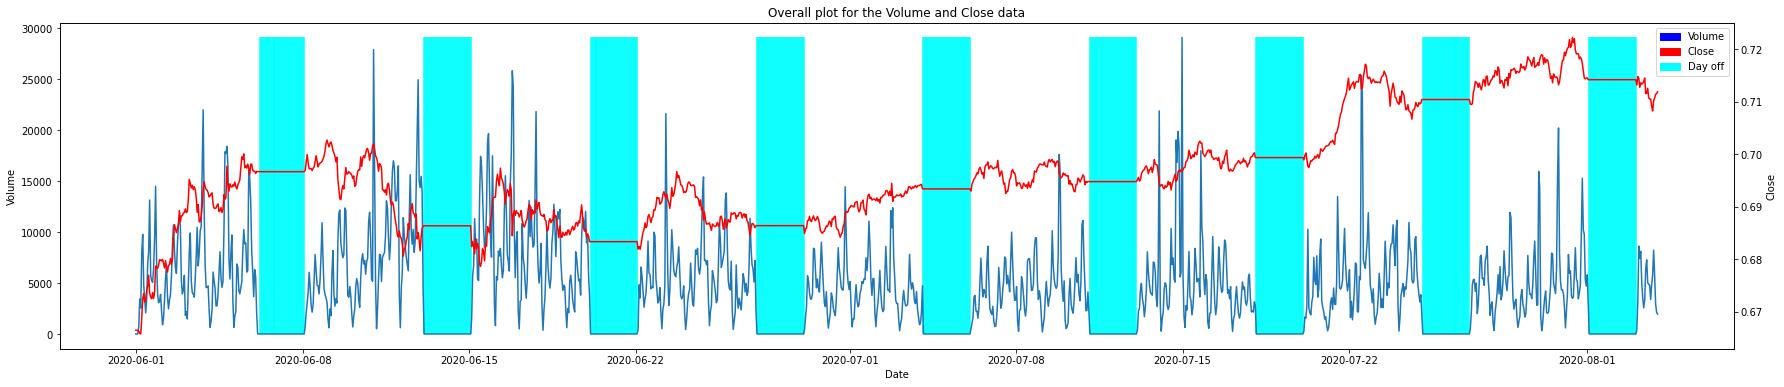

In [33]:
# PLOTTING

fig, ax1 = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(30)

# PLOTTING VOLUME DATA
ax1.plot(Volume_Data['AUD/USD'], label= 'Volume')
#PLOTTING VERTICAL LINES TO SHOW THE ZERO VOLUME TRADIMG DAYS OR DAY OFF
ax1.vlines(x = Xzero[5:], ymin = 0, ymax = VolZero, color = 'cyan')

# COMBINING TWO PLOTS WITH DIFFERET Y AXIS
ax2 = ax1.twinx()
#PLOTTING CLOSE PRICE
ax2.plot(Close_Data['AUD/USD'],color = 'red')
#SETTING THE LEGENDS
Volume = mpatch.Patch(color = 'blue', label = 'Volume')
Close = mpatch.Patch(color = 'red', label = 'Close')
Day_off = mpatch.Patch(color = 'cyan', label = "Day off")
plt.legend(handles = [Volume, Close, Day_off])
plt.title("Overall plot for the Volume and Close data")
ax1.set_xlabel("Date")
ax1.set_ylabel("Volume")
ax2.set_ylabel("Close");
fig.show()

<u>From the Big picture we can see follwing key areas;</u>

1) Volume with zero  called as DAY OFF in chart, its saturday and sunday

2)As the volume is increasing, close price is also increasing because of high volatility.

3)However, there are areas where as the volume increase , the price also increaisg in some time period.


### **(2 & 3) Finding the suitable time period for the entry and giving the examples**

I have analysed the movements of volume and close price, and I can see that at09:30 to 13:30 GMT+00 there is a spike in volume and also spike in close price, and at 16:30 to 19:30 also there is a spike in volume data with close price

Giving some examples from the chart to show the volume and close spike.



In [34]:

''' I am making new user fucntion to get the range of plots without sprcifically writing all plotting codes again and again, this function need start and end index values of example data
 and xstart and xend is used for plotting lines in x range and ystart and yend will act as lines maximum point to plot'''


def VolumeClosePlot(start, end, xstart, xend, ystart, yend):

  ### PLOTTING THE VOLUME DATA AND THE CLOSE PRICE SIDE BY SIDE FOR ANALYSIS...

  fig1 = make_subplots(specs = [[{"secondary_y": True}]])                          #  to have dual y axis we need to call secondary_y axis as True

  x1 = start
  x2 = end

  # CLOSE PLOT
  fig1.add_trace(go.Scatter(mode = 'lines', x = Close_Data.index[x1:x2], y = Close_Data['AUD/USD'][x1:x2], name = 'Close'), secondary_y = False)
  #VOLUME PLOT
  fig1.add_trace(go.Scatter(mode = 'lines', x = Volume_Data.index[x1:x2], y = Volume_Data['AUD/USD'][x1:x2], name = 'Volume'), secondary_y = True)
  fig1.add_trace(go.Scatter(mode='lines', x = [xstart, xstart], y = [0, ystart], name = 'Stratergy start point'), secondary_y = True)
  fig1.add_trace(go.Scatter(mode='lines', x =  [xend, xend], y = [0, yend], name = 'Stratergy end point'), secondary_y = True)
  #PLOT UPDATING
  fig1.update_layout( title_text = " Spike in Volume and Close price", title_x = 0.4)
  fig1.update_xaxes(title_text = "Date") 
  fig1.update_yaxes(title_text = "Voume", secondary_y=True)
  fig1.update_yaxes(title_text = "Close", secondary_y=False)

  #DISPLAYING THE PLOT
  fig1.show()
  return


### **Stratergy 09:30<->13:30**

Out of two stratergy we will check now first stratergy with examples.

In [35]:

print("------------------------------------------------------------------EXAMPLE 1 -------------------------------------------------------------------------")
print("plotting...")
# CALLING THE PLOT FUNCTION 
VolumeClosePlot(0,50, Volume_Data.index[10], Volume_Data.index[14], 20000, 20000)
print("plotting completed")
print()
print("-------------------------------------------------------------------EXAMPLE 2 -------------------------------------------------------------------------")
print("plotting...")
# CALLING THE PLOT FUNCTION
VolumeClosePlot(250,300, Volume_Data.index[274], Volume_Data.index[278], 20000, 20000)
print("plotting completed")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------")


------------------------------------------------------------------EXAMPLE 1 -------------------------------------------------------------------------
plotting...


plotting completed

-------------------------------------------------------------------EXAMPLE 2 -------------------------------------------------------------------------
plotting...


plotting completed
--------------------------------------------------------------------------------------------------------------------------------------------------------


**Analysis**

From the both example we can see that at start point (Green line) 09:30 or near to 09:30 there is increase in volume (red line) and ase well close price (blue line) and that extends to 13:30 or closer to 13:30 (purple line) which acts as end point.

I believe that giving two examples would not make any one satisified, there fore after the startergy -2 section I will Analyse overall data.


### **Stratergy 16:30<->19:30**

Checking the stratergy visually by giving examples form the big picture chart

In [36]:

print("------------------------------------------------------------------EXAMPLE 1 -------------------------------------------------------------------------")
print("plotting...")
# CALLING THE PLOT FUNCTION 
VolumeClosePlot(850,900, Volume_Data.index[857], Volume_Data.index[860], 20000, 20000)
print("plotting completed")
print()
print("-------------------------------------------------------------------EXAMPLE 2 -------------------------------------------------------------------------")
print("plotting...")
# CALLING THE PLOT FUNCTION
VolumeClosePlot(1200, 1250, Volume_Data.index[1217], Volume_Data.index[1220], 20000, 20000)
print("plotting completed")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------EXAMPLE 1 -------------------------------------------------------------------------
plotting...


plotting completed

-------------------------------------------------------------------EXAMPLE 2 -------------------------------------------------------------------------
plotting...


plotting completed
--------------------------------------------------------------------------------------------------------------------------------------------------------


**Analysis**

From the both example we can see that at start point (Green line) 16:30 or near to 16:30 there is increase in volume (red line) and ase well close price (blue line) and that extends to 19:30 or closer to 19:30 (purple line) which acts as end point.

I believe that giving two examples would not make any one satisified, therefore after now I will test the startegy for overall data

## **(4&5) Testing the stratergy for overall data and Analysing the results from the test**

Checking any stratergy is really important in financial world becuase, the market moves randomly and the pattern you see today might not be there tomorrow, therefore taking or using someones stratergy might not work for you, therefore in any hedge funds they will test the stratergy and stress test the stratergy to see if that will work or not.

Therefore do not become like a person in the photo who just search for holy grail stratergy and applies in the market without knowing performance results.


Now we saw few exapmples showing that it follows the rule but it is also important to check for rest of the data otherwise trading will be same as this picture below;


![picture](https://drive.google.com/uc?export=view&id=1icdU0e3UWjBoTMHtGt2_v6Pg03gk8OHJ)

Therefore we should analyse for the rest of the data that if our stratergy holds or not.

I am creating a function which will allow me to extract all the data and process it for calculation.

***Algorithm for the TestChecker() function***

*Step 0: We create empty list to save all the results and ID for each data using length of the data*.

*Step 1: Function requires two input parameters, 'start' time and 'end' time, we have the start and end time from the rules*.

*Step 2: Use the start time to extract the details from the dataset*, 

*Step 3: using for loop to iterate each index values along with ID of each data*.

*Step 4: Now pass the start point in the data of local time to check match the start point, if matches then use this start point as a first stop and get it's ID value*.

*Step 5: After getting th ID value we use that ID to extract the Volume, close and high data at that Stop point using the ID and save the result*.

*Step 6: After stopping at first point, continue matching the end time, once it matches get its ID value and find the corresponding Volume, Close and High data and then use break to stop continuing and save the resuls*

In [37]:
def TestChecker(start, end):

# SAVE RESULTS IN THESE LISTS

  Vol_0930_ = []                                                                         
  Vol_1330_ = []
  Close_0930_ = []
  Close_1330_ = []
  High_1330_ = []

# Starting Cerebro engine for extracting..

  for volStart,ixStart in zip(Volume_Data.index, range(len(Volume_Data))):  
# USING START POINT TO GET THE ID VALUE OF START TIME   
    if (str (volStart)[11:16] == start):
# EXTRACTING THE DATA USING ID AND SAVING THE RESULT
      Vol_0930_.append(Volume_Data['AUD/USD'][ixStart])                                 
      Close_0930_.append(Close_Data['AUD/USD'][ixStart])
      for volEnd, ixEnd in zip(Volume_Data.index[ixStart:], range(ixStart, len(Volume_Data))): 
# USING END POINT TO GET THE ID VALUE OF END TIME   
        if (str (volEnd)[11:16] == end):
 # EXTRACTING THE DATA USING ID AND SAVING THE RESULT
          Vol_1330_.append(Volume_Data['AUD/USD'][ixEnd])                                  
          Close_1330_.append(Close_Data['AUD/USD'][ixEnd])
          High_1330_.append(High_Data['AUD/USD'][ixEnd])
          break;

  return (Vol_0930_, Vol_1330_, Close_0930_, Close_1330_, High_1330_)

#### **Stratergy 09:30<->13:30**

<u>From the result of function TestChecker() we use these questions to answer</u>

Supporting Questions for the Main question:

1) How many times volume went up at 09:30 to 13:30 from overall data?

2) How many times close price went up at 09:30 to 13:30 from overall data?

3) How many times High price went up at 09:30 to 13:30 from overall data?

4) How many times volume did not went up at 09:30 to 13:30 from overall data?

5) How many times close price did not went up at 09:30 to 13:30 from overall data?

6) How many times high price did not went up at 09:30 to 13:30 from overall data?

In [38]:

Vol_0930_, Vol_1330_, Close_0930_, Close_1330_, High_1330_ = TestChecker(start = '09:30', end = '13:30')    #CALLING THE TEST CHECKER FUNCTION

Test_analysis = pd.DataFrame()                                                                               # EMPTY DATAFRAME TO SAVE THE RESULTS

### SAVING ALL THE RESULTS IN DATAFRAME
Test_analysis['VOL@0930'] = Vol_0930_
Test_analysis['VOL@1330'] = Vol_1330_
Test_analysis['CLOSE@0930'] = Close_0930_
Test_analysis['CLOSE@1330'] = Close_1330_
Test_analysis['HIGH@1330'] = High_1330_

In [39]:
Test_analysis

VOL@0930    VOL@1330  CLOSE@0930  CLOSE@1330  HIGH@1330
0   2064.8401  13135.4404     0.67236     0.67356    0.67698
1   3321.0200  10691.6104     0.67895     0.68427    0.68431
2   3931.0901  10468.5195     0.69325     0.68892    0.69218
3   2773.4500   5498.3398     0.69027     0.68985    0.69006
4   4525.3301   8833.9004     0.69745     0.69742    0.70048
..        ...         ...         ...         ...        ...
59  2162.6399   7821.9102     0.71703     0.71359    0.71550
60  3494.1201   5416.5098     0.72221     0.71908    0.72033
61     0.0000      0.0000     0.71418     0.71418    0.71418
62     0.0000      0.0000     0.71418     0.71418    0.71418
63  2562.6899   5027.1699     0.71381     0.71254    0.71293

[64 rows x 5 columns]

In [40]:

### PASSING THE ANALYSED DATA TO THE DATAFRAME
### PREPARING THE DATA TO ANSWER THE QUESTIONS

### IF CURRENT VOLUME IS LOWER(09:30 OR 16:30) THAN NEXT HOUR(13:30 OR 19:30) VOLUME THEN , THE DIFFERECE BETWEEN THEM IS ALWAYS NEGATIVE, HOWEVER IT IS IN THE POSITIVE DIRECTION WE WILL CLASSIFY IT AS 1 AND OTHER AS -1.
Test_analysis['VOLBIN'] = np.where(Test_analysis['VOL@0930']-Test_analysis['VOL@1330']<=0, 1, -1)


### IF CURRENT CLOSE IS LOWER(09:30 OR 16:30) THAN NEXT HOUR(13:30 OR 19:30) CLOSE THEN , THE DIFFERECE BETWEEN THEM IS ALWAYS NEGATIVE, HOWEVER IT IS IN THE POSITIVE DIRECTION WE WILL CLASSIFY IT AS 1 AND OTHER AS -1.
Test_analysis['CLOSEBIN'] = np.where(Test_analysis['CLOSE@0930']-Test_analysis['CLOSE@1330']<=0, 1, -1)


### IF CURRENT HIGH IS LOWER(09:30 OR 16:30) THAN NEXT HOUR(13:30 OR 19:30) HIGH THEN , THE DIFFERECE BETWEEN THEM IS ALWAYS NEGATIVE, HOWEVER IT IS IN THE POSITIVE DIRECTION WE WILL CLASSIFY IT AS 1 AND OTHER AS -1.
Test_analysis['HIGHBIN'] = np.where(Test_analysis['CLOSE@0930']-Test_analysis['HIGH@1330']<=0, 1, -1)

In [41]:
Test_analysis                                                                     # OPEN THE ANALYSIS FOR STRATERGY 1

VOL@0930    VOL@1330  CLOSE@0930  ...  VOLBIN  CLOSEBIN  HIGHBIN
0   2064.8401  13135.4404     0.67236  ...       1         1        1
1   3321.0200  10691.6104     0.67895  ...       1         1        1
2   3931.0901  10468.5195     0.69325  ...       1        -1       -1
3   2773.4500   5498.3398     0.69027  ...       1        -1       -1
4   4525.3301   8833.9004     0.69745  ...       1        -1        1
..        ...         ...         ...  ...     ...       ...      ...
59  2162.6399   7821.9102     0.71703  ...       1        -1       -1
60  3494.1201   5416.5098     0.72221  ...       1        -1       -1
61     0.0000      0.0000     0.71418  ...       1         1        1
62     0.0000      0.0000     0.71418  ...       1         1        1
63  2562.6899   5027.1699     0.71381  ...       1        -1       -1

[64 rows x 8 columns]

1) How many times volume went up at 09:30 to 13:30 from overall data?

4) How many times volume did not went up at 09:30 to 13:30 from overall data?

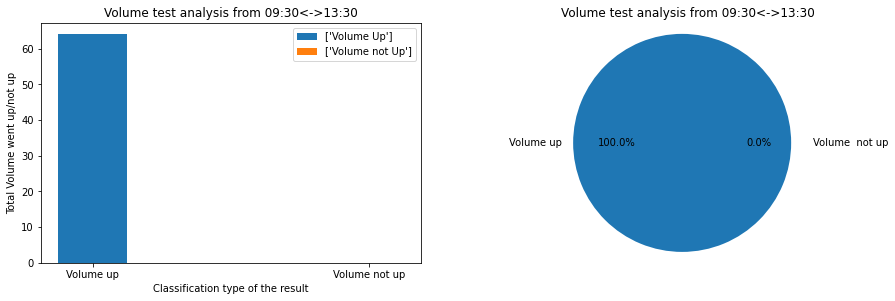

In [42]:

### SOLUTION TO 1&4

Total_data = len(Test_analysis['VOLBIN'])
# POSITIVE VOLUME THAT IS CURRENT VOLUME < NEXT HOUR VOLUME
Vol_one = len(Test_analysis[Test_analysis['VOLBIN']==1])
# NEGATIVE VOLUME THAT IS CURRENT VOLUME  > NEXT HOUR VOLUME
Vol_not_one = len(Test_analysis[Test_analysis['VOLBIN']==-1])

#PLOTTING ALL THE RESULTS ....

plt.figure(figsize = (15,15))

plt.subplot(321)
plt.bar(x = ['Volume up'],height= Vol_one, label = ["Volume Up"], width = 0.25)
plt.bar(x = ['Volume not up'],height= Vol_not_one, label = ["Volume not Up"], width = 0.25)
plt.title("Volume test analysis from 09:30<->13:30")
plt.xlabel("Classification type of the result")
plt.ylabel("Total Volume went up/not up")
plt.legend()


plt.subplot(322)
plt.pie(x = [Vol_one, Vol_not_one], labels=['Volume up', 'Volume  not up'],autopct= '%1.1f%%', explode = [0.1,0])
plt.title("Volume test analysis from 09:30<->13:30")
plt.title("Volume test analysis from 09:30<->13:30")
plt.axis('equal')
plt.show()


**Analysis**

From the volume Analysis we can see that Volume went up everytime at 09:30 till 13:30 so there is not data of volume did not went up at this point, so there is a volatility during 09:30 till 13:30.

From the both chart it is evident that we have volume up at this time



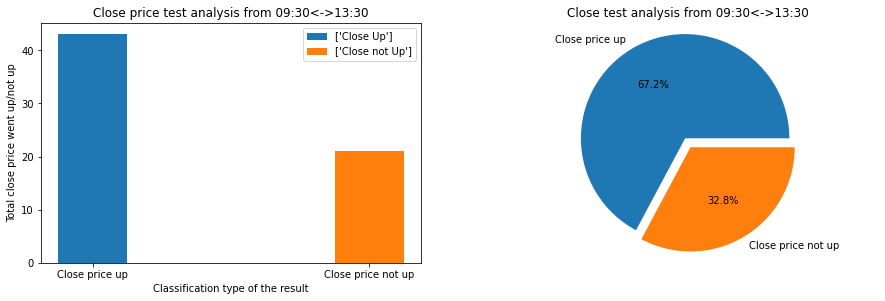

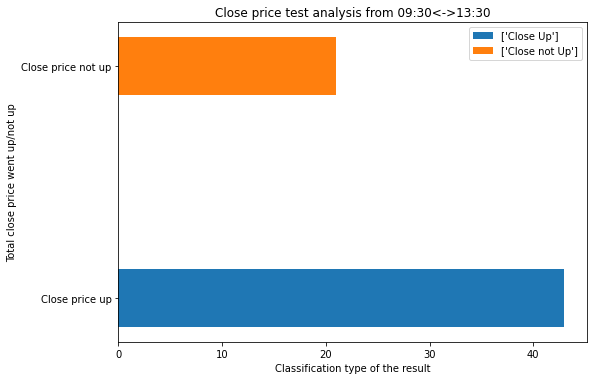

In [43]:

### SOLUTION TO 2&5

Total_data = len(Test_analysis['CLOSEBIN'])
# POSITIVE CLOSE PRICE THAT IS CURRENT PRICE < NEXT HOUR PRICE
Close_one = len(Test_analysis[Test_analysis['CLOSEBIN']==1])
# NEGATIVE CLOSE PRICE THAT IS CURRENT CLOSE PRICE  > NEXT HOUR CLOSE PRICE
Close_not_one = len(Test_analysis[Test_analysis['CLOSEBIN']==-1])

#PLOTTING ALL THE RESULTS ....

plt.figure(figsize = (15,15))

plt.subplot(321)
### PLOTTING BAR PLOT
plt.bar(x = ['Close price up'],height= Close_one, label = ["Close Up"], width = 0.25)
plt.bar(x = ['Close price not up'],height= Close_not_one, label = ["Close not Up"], width = 0.25)
plt.title("Close price test analysis from 09:30<->13:30")
plt.xlabel("Classification type of the result")
plt.ylabel("Total close price went up/not up")
plt.legend()

### PLOTTING PIE CHART
plt.subplot(322)
plt.pie(x = [Close_one, Close_not_one], labels=['Close price up', 'Close price not up'],autopct= '%1.1f%%', explode = [0.1,0])
plt.title("Close price test analysis from 09:30<->13:30")
plt.title("Close test analysis from 09:30<->13:30")
plt.axis('equal')
plt.show()

### PLOTTING HORIZONRAL BAR PLOT
plt.figure(figsize = (15,15))
plt.subplot(321)
plt.barh(y = ['Close price up'], width=[Close_one], label = ["Close Up"], height = 0.25)
plt.barh(y = ['Close price not up'], width=[Close_not_one], label = ["Close not Up"], height = 0.25)
plt.title("Close price test analysis from 09:30<->13:30")
plt.xlabel("Classification type of the result")
plt.ylabel("Total close price went up/not up")
plt.legend()

plt.tight_layout()
plt.show()

**Analysis**

From the Close price Analysis we can see that Close price went up 67.2% (from piec hart) and the rest of 32.8% times the close price did not went up  at 09:30 till 13:30 so there is a chance of 67.2% getting right from our rules and we also have a chnace getting wrong by 32.8%.

From the both chart it is evident that we have close price up at this time

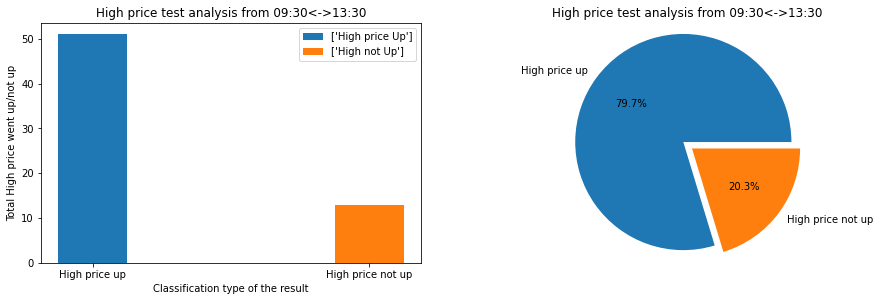

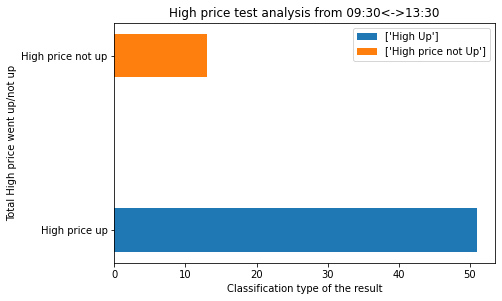

In [44]:

### SOLUTION TO 3&6

# WE ARE USING HIGH PRICE BECAUSE THERE IS A CHANCE THAT PRICE MIGHT GO UP BY 13:30 AND COME DOWN BELOW THE CURRENT CLOS PRICE, SO WE DO HAVE HIGHER PRICE WITHIN THIS RANGE TO VALIDATE THE STRATERGY.
Total_data = len(Test_analysis['HIGHBIN'])
# POSITIVE CLOSE PRICE THAT IS CURRENT CLOSE PRICE < NEXT HIGH PRICE
High_one = len(Test_analysis[Test_analysis['HIGHBIN']==1])
# NEGATIVE CLOSE PRICE THAT IS CURRENT CLOSE PRICE  > NEXT HOUR HIGH PRICE
High_not_one = len(Test_analysis[Test_analysis['HIGHBIN']==-1])


#PLOTTING ALL THE RESULTS ....


plt.figure(figsize = (15,15))
### PLOTTING BAR PLOT
plt.subplot(321)
plt.bar(x = ['High price up'],height= High_one, label = ["High price Up"], width = 0.25)
plt.bar(x = ['High price not up'],height= High_not_one, label = ["High not Up"], width = 0.25)
plt.title("High price test analysis from 09:30<->13:30")
plt.xlabel("Classification type of the result")
plt.ylabel("Total High price went up/not up")
plt.legend()

### PLOTTING PIE CHART
plt.subplot(322)
plt.pie(x = [High_one, High_not_one], labels=['High price up', 'High price not up'],autopct= '%1.1f%%', explode = [0.1,0])
plt.title("High price test analysis from 09:30<->13:30")
plt.title("High price test analysis from 09:30<->13:30")
plt.axis('equal')
plt.show()

### PLOTTING HORIZONTAL BAR PLOT
plt.figure(figsize = (15,15))
plt.subplot(321)
plt.barh(y = ['High price up', 'High price not up'], width=[High_one, High_not_one], label = ["High Up"], height = 0.25)
plt.barh(y = ['High price not up'], width=[High_not_one], label = ["High price not Up"], height = 0.25)
plt.title("High price test analysis from 09:30<->13:30")
plt.xlabel("Classification type of the result")
plt.ylabel("Total High price went up/not up")
plt.legend()
plt.show()

**Analysis**

From the High price Analysis we can see that High price went up 79.7% (from piechart)  that is, current close price is lesser than the next hours, and the price did went to that level and might have come back later but it can be proved form the high price, so we are using high price to see if that close price of current lesser than next coming hour, and we can see that only 20.3% times the close price did not went up that there was no high,  at 09:30 till 13:30 so there is a chance of 79.7% getting right from our rules and we also have a chnace getting wrong by 20.3%.

From the both chart it is evident that we have close price up at this time

#### Stratergy 16:30<->19:30


<u>From the result of function TestChecker() we use these questions to answer</u>

Supporting Questions for the Main question:

1) How many times volume went up at 16:30 to 19:30 from overall data?

2) How many times close price went up at 16:30 to 19:30 from overall data?

3) How many times High price went up at 16:30 to 19:30 from overall data?

4) How many times volume did not went up at 16:30 to 19:30 from overall data?

5) How many times close price did not went up at 16:30 to 19:30 from overall data?

6) How many times high price did not went up at 16:30 to 19:30 from overall data?

In [45]:

Vol_1630_, Vol_1930_, Close_1630_, Close_1930_, High_1930_ = TestChecker(start = '16:30', end = '19:30')               #CALLING THE TEST CHECKER FUNCTION

Test_analysis_ = pd.DataFrame()                                                                                         # CREATING EMPTY DATAFRAME TO FILL TEH RESULTS LATER

### SAVING ALL THE RESULTS IN DATAFRAME
Test_analysis_['VOL@1630'] = Vol_1630_
Test_analysis_['VOL@1930'] = Vol_1930_
Test_analysis_['CLOSE@1630'] = Close_1630_
Test_analysis_['CLOSE@1930'] = Close_1930_
Test_analysis_['HIGH@1930'] = High_1930_

In [46]:
Test_analysis_

VOL@1630    VOL@1930  CLOSE@1630  CLOSE@1930  HIGH@1930
0    5058.1099  14490.0596     0.67369     0.67872    0.67877
1    5940.2402  11380.3896     0.68509     0.68931    0.68948
2   10112.4004  21983.5898     0.68716     0.69327    0.69404
3   10183.9600  18403.5508     0.69230     0.69773    0.69794
4    6192.6401  13028.9199     0.69811     0.69811    0.69866
..         ...         ...         ...         ...        ...
59   3957.2100  20211.0293     0.71457     0.71318    0.71465
60   4047.3201  15273.1504     0.71814     0.71724    0.71853
61      0.0000      0.0000     0.71418     0.71418    0.71418
62      0.0000      0.0000     0.71418     0.71418    0.71418
63   3379.8301   8215.9102     0.71050     0.71018    0.71042

[64 rows x 5 columns]

In [47]:

### PASSING THE ANALYSED DATA TO THE DATAFRAME
### PREPARING THE DATA TO ANSWER THE QUESTIONS


### IF CURRENT VOLUME IS LOWER(16:30) THAN NEXT HOUR(19:30) VOLUME THEN , THE DIFFERECE BETWEEN THEM IS ALWAYS NEGATIVE, HOWEVER IT IS IN THE POSITIVE DIRECTION WE WILL CLASSIFY IT AS 1 AND OTHER AS -1.
Test_analysis_['VOLBIN'] = np.where(Test_analysis_['VOL@1630']-Test_analysis_['VOL@1930']<=0, 1, -1)

### IF CURRENT CLOSE IS LOWER(16:30) THAN NEXT HOUR(19:30) CLOSE THEN , THE DIFFERECE BETWEEN THEM IS ALWAYS NEGATIVE, HOWEVER IT IS IN THE POSITIVE DIRECTION WE WILL CLASSIFY IT AS 1 AND OTHER AS -1.
Test_analysis_['CLOSEBIN'] = np.where(Test_analysis_['CLOSE@1630']-Test_analysis_['CLOSE@1930']<=0, 1, -1)

## IF CURRENT HIGH IS LOWER(16:30) THAN NEXT HOUR(19:30) HIGH THEN , THE DIFFERECE BETWEEN THEM IS ALWAYS NEGATIVE, HOWEVER IT IS IN THE POSITIVE DIRECTION WE WILL CLASSIFY IT AS 1 AND OTHER AS -1.
Test_analysis_['HIGHBIN'] = np.where(Test_analysis_['CLOSE@1630']-Test_analysis_['HIGH@1930']<=0, 1, -1)

In [48]:
Test_analysis_

VOL@1630    VOL@1930  CLOSE@1630  ...  VOLBIN  CLOSEBIN  HIGHBIN
0    5058.1099  14490.0596     0.67369  ...       1         1        1
1    5940.2402  11380.3896     0.68509  ...       1         1        1
2   10112.4004  21983.5898     0.68716  ...       1         1        1
3   10183.9600  18403.5508     0.69230  ...       1         1        1
4    6192.6401  13028.9199     0.69811  ...       1         1        1
..         ...         ...         ...  ...     ...       ...      ...
59   3957.2100  20211.0293     0.71457  ...       1        -1        1
60   4047.3201  15273.1504     0.71814  ...       1        -1        1
61      0.0000      0.0000     0.71418  ...       1         1        1
62      0.0000      0.0000     0.71418  ...       1         1        1
63   3379.8301   8215.9102     0.71050  ...       1        -1       -1

[64 rows x 8 columns]

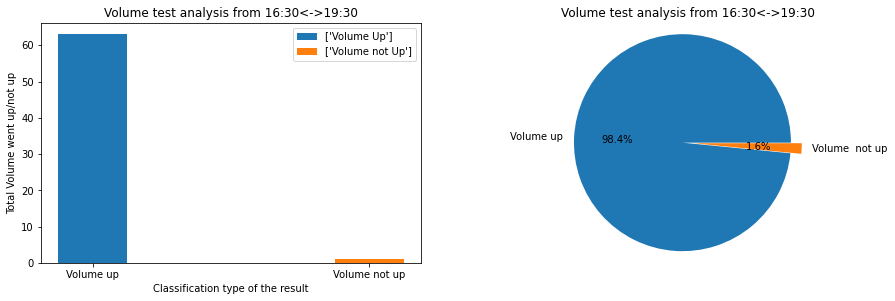

In [49]:

### SOLUTION TO 1&4

Total_data = len(Test_analysis_['VOLBIN'])
# POSITIVE VOLUME THAT IS CURRENT VOLUME < NEXT HOUR VOLUME
Vol_one_ = len(Test_analysis_[Test_analysis_['VOLBIN']==1])
# NEGATIVE VOLUME THAT IS CURRENT VOLUME  > NEXT HOUR VOLUME
Vol_not_one_ = len(Test_analysis_[Test_analysis_['VOLBIN']==-1])


#PLOTTING ALL THE RESULTS ....

plt.figure(figsize = (15,15))
### PLOTTING BAR PLOT
plt.subplot(321)
plt.bar(x = ['Volume up'],height= Vol_one_, label = ["Volume Up"], width = 0.25)
plt.bar(x = ['Volume not up'],height= Vol_not_one_, label = ["Volume not Up"], width = 0.25)
plt.title("Volume test analysis from 16:30<->19:30")
plt.xlabel("Classification type of the result")
plt.ylabel("Total Volume went up/not up")
plt.legend()

### PLOTTING PIE CHART
plt.subplot(322)
plt.pie(x = [Vol_one_, Vol_not_one_], labels=['Volume up', 'Volume  not up'],autopct= '%1.1f%%', explode = [0.1,0])
plt.title("Volume test analysis from 16:30<->19:30")
plt.axis('equal')
plt.show()


**Analysis**

From the volume Analysis we can see that Volume went up 98.4% times at 16:30 till 19:30 so there is a chance of getting right atleast 98.4% times and 1.6% we can get wrong, so there is a volatility during 16:30 till 19:30.

From the both chart it is evident that we have volume up at this time

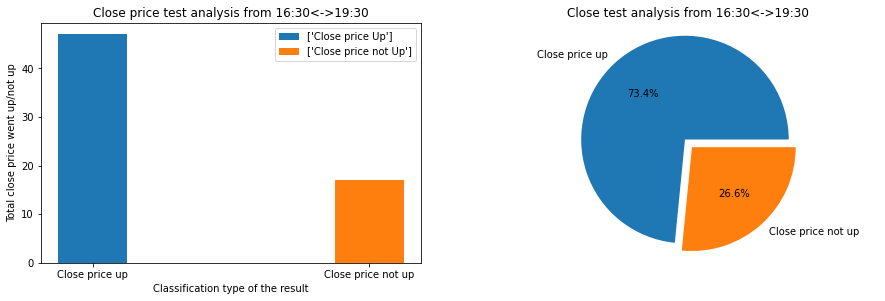

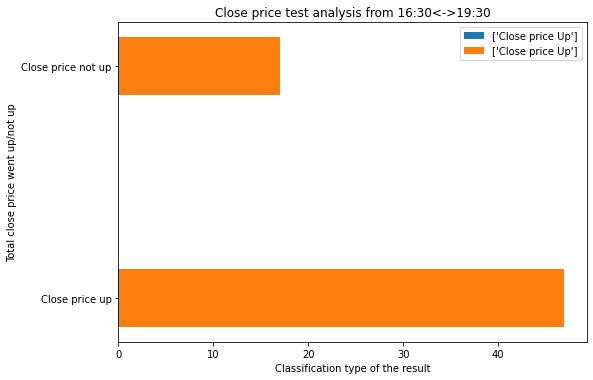

In [50]:

### SOLUTION TO 2&5

# POSITIVE CLOSE PRICE THAT IS CURRENT PRICE < NEXT HOUR PRICE
Close_one_ = len(Test_analysis_[Test_analysis_['CLOSEBIN']==1])
# NEGATIVE CLOSE PRICE THAT IS CURRENT CLOSE PRICE  > NEXT HOUR CLOSE PRICE
Close_not_one_ = len(Test_analysis_[Test_analysis_['CLOSEBIN']==-1])


#PLOTTING ALL THE RESULTS ....

plt.figure(figsize = (15,15))
### PLOTTING THE BAR PLOT
plt.subplot(321)
plt.bar(x = ['Close price up'],height= Close_one_, label = ["Close price Up"], width = 0.25)
plt.bar(x = ['Close price not up'],height= Close_not_one_, label = ["Close price not Up"], width = 0.25)
plt.title("Close price test analysis from 16:30<->19:30")
plt.xlabel("Classification type of the result")
plt.ylabel("Total close price went up/not up")
plt.legend()

### PLOTTING THE PIE CHART
plt.subplot(322)
plt.pie(x = [Close_one_, Close_not_one_], labels=['Close price up', 'Close price not up'],autopct= '%1.1f%%', explode = [0.1,0])
plt.title("Close price test analysis from 16:30<->19:30")
plt.title("Close test analysis from 16:30<->19:30")
plt.axis('equal')
plt.show()

### PLOTTING THE HORIZONTAL BAR PLOT
plt.figure(figsize = (15,15))
plt.subplot(321)
plt.barh(y = ['Close price up', 'Close price not up'], width=[Close_one_, Close_not_one_], label = ["Close price Up"], height = 0.25)
plt.barh(y = ['Close price up', 'Close price not up'], width=[Close_one_, Close_not_one_], label = ["Close price Up"], height = 0.25)
plt.title("Close price test analysis from 16:30<->19:30")
plt.xlabel("Classification type of the result")
plt.ylabel("Total close price went up/not up")
plt.legend()

plt.tight_layout()
plt.show()


**Analysis**

From the Close price Analysis we can see that Close price went up 73.4% (from pie chart) and the rest of 26.6% times the close price did not went up  at 16:30 till 19:30 so there is a chance of 73.4% getting right from our rules and we also have a chnace getting wrong by 26.6%.

From the both chart it is evident that we have close price up at this time

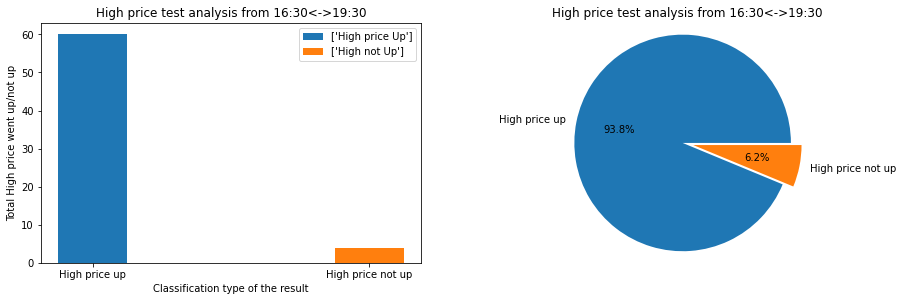

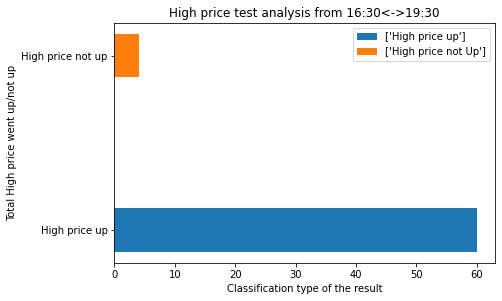

In [51]:

### SOLUTION TO 3&6

# WE ARE USING HIGH PRICE BECAUSE THERE IS A CHANCE THAT PRICE MIGHT GO UP BY 19:30 AND COME DOWN BELOW THE CURRENT CLOS PRICE, SO WE DO HAVE HIGHER PRICE WITHIN THIS RANGE TO VALIDATE THE STRATERGY.

# POSITIVE CLOSE PRICE THAT IS CURRENT CLOSE PRICE < NEXT HIGH PRICE
High_one_ = len(Test_analysis_[Test_analysis_['HIGHBIN']==1])
# NEGATIVE CLOSE PRICE THAT IS CURRENT CLOSE PRICE  > NEXT HOUR HIGH PRICE
High_not_one_ = len(Test_analysis_[Test_analysis_['HIGHBIN']==-1])


#PLOTTING ALL THE RESULTS ....

plt.figure(figsize = (15,15))
### PLOTTING THE BAR PLOT
plt.subplot(321)
plt.bar(x = ['High price up'],height= High_one_, label = ["High price Up"], width = 0.25)
plt.bar(x = ['High price not up'],height= High_not_one_, label = ["High not Up"], width = 0.25)
plt.title("High price test analysis from 16:30<->19:30")
plt.xlabel("Classification type of the result")
plt.ylabel("Total High price went up/not up")
plt.legend()

### PLOTTING THE PIE CHART
plt.subplot(322)
plt.pie(x = [High_one_, High_not_one_], labels=['High price up', 'High price not up'],autopct= '%1.1f%%', explode = [0.1,0])
plt.title("High price test analysis from 16:30<->19:30")
plt.axis('equal')
plt.show()

### PLOTTING THE HORIZONTAL PLOT
plt.figure(figsize = (15,15))
plt.subplot(321)
plt.barh(y = ['High price up', 'High price not up'], width=[High_one_, High_not_one_], label = ["High price up"], height = 0.25)
plt.barh(y = ['High price not up'], width=[High_not_one_], label = ["High price not Up"], height = 0.25)
plt.title("High price test analysis from 16:30<->19:30")
plt.xlabel("Classification type of the result")
plt.ylabel("Total High price went up/not up")
plt.legend()
plt.show()

**Analysis**

From the High price Analysis we can see that High price went up 93.8% (from piechart)  that is, current close price is lesser than the next hours, and the price did went to that level and might have come back later but it can be proved form the high price, so we are using high price to see if that close price of current lesser than next coming hour, and we can see that only 6.2% times the close price did not went up So, there was no high,  at 16:30 till 19:30 so there is a chance of 93.8% getting right from our rules and we also have a chance getting wrong by 6.2%.

From the both chart it is evident that we have close price up at this time

## **(6) Concluding the best method for the entry**

In this section of notebook we are comparing the two stratergies to check which will be better to trade during the 24hr market.

we will use close price to check the results because they are important at the end of they day while trading that is if next hour will bull or bear based on the volume flow .

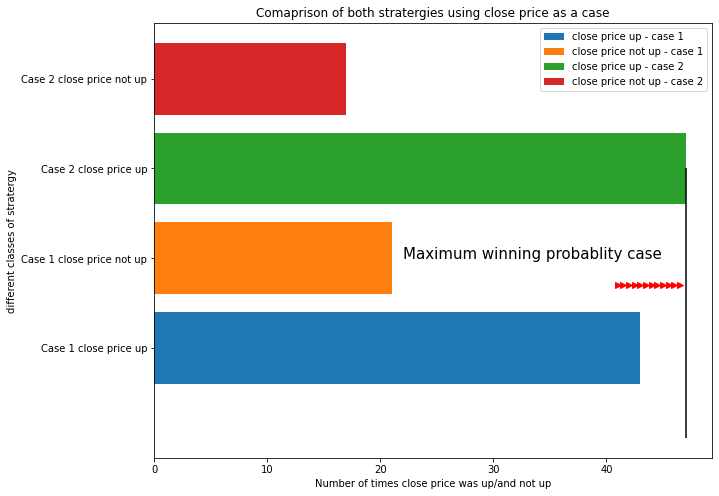

In [52]:


### PLOTTING TO COMPARE THE BEST STRATERGY
plt.figure(figsize = (10,8))

###PLOTTING ALL HORIZONTAL BARS
plt.barh(y = ["Case 1 close price up"], width = [Close_one], label = "close price up - case 1")
plt.barh(y = ["Case 1 close price not up"], width = [Close_not_one], label = "close price not up - case 1")
plt.barh(y = ["Case 2 close price up"], width = [Close_one_], label = "close price up - case 2")
plt.barh(y = ["Case 2 close price not up"], width = [Close_not_one_], label = "close price not up - case 2")
plt.vlines(x = 47, ymin = -1, ymax = 2)
plt.text(22, 1, "Maximum winning probablity case", fontsize = 15)
plt.plot(41,0.7, marker = '>', color = 'r')
plt.plot(41.5,0.7, marker = '>', color = 'r')
plt.plot(42,0.7, marker = '>', color = 'r')
plt.plot(42.5,0.7, marker = '>', color = 'r')
plt.plot(43,0.7, marker = '>', color = 'r')
plt.plot(43.5,0.7, marker = '>', color = 'r')
plt.plot(44,0.7, marker = '>', color = 'r')
plt.plot(44.5,0.7, marker = '>', color = 'r')
plt.plot(45,0.7, marker = '>', color = 'r')
plt.plot(45.5,0.7, marker = '>', color = 'r')
plt.plot(46,0.7, marker = '>', color = 'r')
plt.plot(46.5,0.7, marker = '>', color = 'r')
plt.title("Comaprison of both stratergies using close price as a case")
plt.ylabel("different classes of stratergy")
plt.xlabel("Number of times close price was up/and not up")
plt.legend()
plt.show()


fig3 = go.Figure(data =[go.Pie(labels = ["Case 1 close price up", "Case 1 close price not up", " case 2 close price up", "case 2 close price not up"], values = [Close_one, Close_not_one, Close_one_, Close_not_one_], hole = 0.3)])
fig3.update_layout(title = "Comparison of two time rule based stratergies", title_x = 0.4 )
fig3.show()


From the Analysis of two stratergy we can now say that at which time it would better if we trade in the whole 24hr market.

From stratergy 1:

If  we use this stratergy then we will have 33.6% times that we might get right comapring other other all the situation such as case 2 close price up and not up and case 1 close price not up and 16.4% times we might go wrong with our analysis

From stratergy 2:

If we use this stratergy then we will have 36.7% times that we might get right comapring other other all the situation such as case 1 close price up and not up and case 2 close price not up and 13.3% times we might go wrong with our analysis

Therefore we can say that if I want to trade AUD/USD then it would be better if I trade using stratergy 2 that is 16:30 to 19:30 because there is a volatility and prices will go higher.

This is the Volume Analysis with timing method as startergy to enter during volatility.


***IS IT ENOUGH???***

***SO ARE YOU THINKING OF PLACING THE TRADE AT OPEN PRICE AT 16:30 AND CLOSING THE TRADE BEFORE 19:30 OR WAITING TILL 19:30 TO CLOSE THE TRADE???IF SO YOU MIGHT NEED TO LOOK AT MY NEXT ON PROFIT ANALYSIS, WHICH WILL CLEARLY SAY HOW MANY PIPS* YOU CAN EXPECT DURING 16:30 TO 19:30***



 *pips: In forex we calculate the price using pips, 1 pip is = 0.0001 


Overall,I have answered Primary questions and sub questions and concluded that from the volume analysis, we obtained two stratergies, and startegy 2 that is 16:30 to 19:30 and we found that strategy-2 would perform better based on our analysis .

# **PROFIT ANALYSIS**

From the previous analysis, that is volume analysis we found that at 16:30 to 19:30 we have volatility higher compared to the 09:30 to 13:30, so it does not mean that we can place a trade at open price of 16:30 and wait till 19:30 because we do not know how many minimum pips does it makes from the past data, we just cant wait till 19:30.

example: If i place a trade at 16:30 and I planned to close the trade 19:00 that is prior to 30 min of actual exit time, during this i am not sure how much price it will move at that times volatility, consider If i place my take profit at 10 pip from open price and the market made only 5 pips movement and if it went to other side then I loose the trade.

Therefore we should know how many minimum pips we cane expect during 16:30 to 19:30.

**Primary Question of this section is**

What is the minimum pips I can expect from AUD/USD during 16:30 to 19:30 time period.

In [53]:
###########################################################################################################################################################
########################################################## PREPARING THE DATASET FOR THE ANALYSIS #########################################################
#############################################################################################################################################################

print("Data preparation started....")
#IMPORTING DATASET
data = pd.read_csv("/content/AU_H.csv")

#DATETIME PROCESSOR FUNCTION
def DayTimeProcessor (dataset):
  dataset['Local time'] = dataset['Local time'].apply(lambda x:x[:-13])                              
  dataset['Local time'] = dataset['Local time'].apply(lambda x: dt.datetime.strptime(x, "%d.%m.%Y %H:%M:%S"))   
  return (dataset)

# CALLING THE DATETIME PROCESSOR
audusd = DayTimeProcessor(data)

# SETTING THE INDEX AS DATE
audusd = audusd.set_index('Local time')
print(" Data preparation ended...")


### shape property of the dataset

print("The total rows of hourly data: ", data.shape[0])
print("Total features of the hourly data: ", data.shape[1])

Data preparation started....
 Data preparation ended...
The total rows of hourly data:  1537
Total features of the hourly data:  12


## **Minimum pips at 9:30 to 13:30**

In [54]:
## STORING THE CLOSE VALUES OF 09:30
close_09 = []
## STORING THE CLOSE VALUES OF 13:30
close_13 = []
## USING FOR LOOP TO GET THE CLOSE PRICES USING INDEXES.
for close_ix, Close_ in zip(audusd['Close'].index, audusd['Close']):
    if (str (close_ix)[11:16] == '09:30'):
        close_09.append(Close_)
    elif(str (close_ix)[11:16] == '13:30'):
        close_13.append(Close_)

In [55]:
## CREATING EMPTY DATAFRAME TO SAVE THE RESULTS LATER.
testpip = pd.DataFrame()

In [56]:
## PLACING ALL THE STORED VALUES FROM THE LIST TO DATAFRAME WE CREATED
testpip['Close@0930'] = close_09
testpip['Close@1330'] = close_13

In [57]:
## FINDING THE DIFFERENCE BETWEEN OPEN AND CLOSE PRICE IT MADE AT 09:30 TO 13:30, SO WE CAN GET THE TOTAL AMOUNTS OF PIPS IT MADE OVERALL ALL THESE DAYS.
## 1 PIP IS 0.0001, IF WE MULTIPLY 10,000 TO IT WE CAN GET THE PIPS, HERE 10,000 IS A LOT.
testpip['delta_1'] = -(testpip['Close@0930']-testpip['Close@1330'])*10000

In [58]:
## FROM THE OVERALL DIFFERENCE PIPS WE CALCULATED, WE WILL CHECK HOW MANY TIMES THERE WAS MORE THAN 3PIP, 4PIP, 5PIP, 6PIP, 7PIP, 8PIP, 9PIP AND 10PIP
_s1_3 = len(testpip[testpip['delta_1'] >= 3])
_s1_4 = len(testpip[testpip['delta_1'] >= 4])
_s1_5 = len(testpip[testpip['delta_1'] >= 5])
_s1_6 = len(testpip[testpip['delta_1'] >= 6])
_s1_7 = len(testpip[testpip['delta_1'] >= 7])
_s1_8 = len(testpip[testpip['delta_1'] >= 8])
_s1_9 = len(testpip[testpip['delta_1'] >= 9])
_s1_10 = len(testpip[testpip['delta_1'] >= 10])

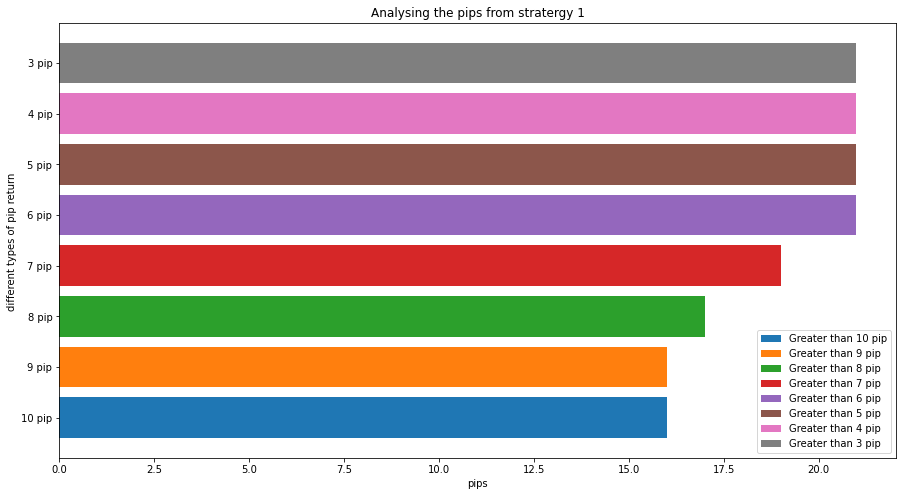

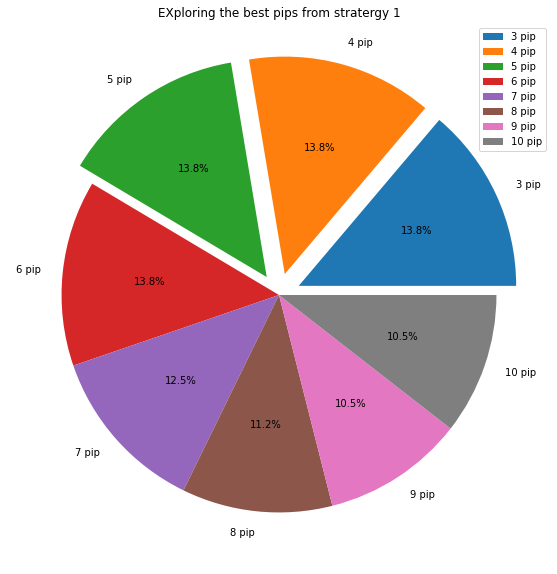

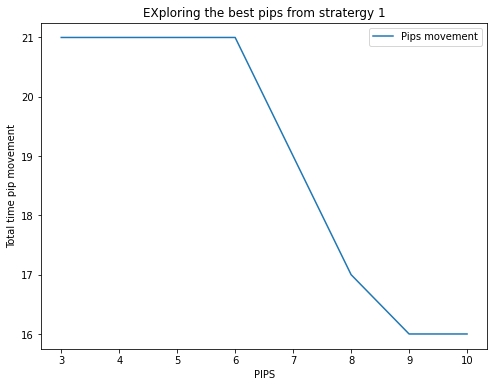

In [59]:
## PLOTTING THE PIPS MOVEMENT IN HORIZONTAL BAR PLOT.
plt.figure(figsize = (15,8))

plt.barh(y = ['10 pip'], width = _s1_10, label = 'Greater than 10 pip')
plt.barh(y = ['9 pip'], width = _s1_9, label = 'Greater than 9 pip')
plt.barh(y = ['8 pip'], width = _s1_8, label = 'Greater than 8 pip')
plt.barh(y = ['7 pip'], width = _s1_7, label = 'Greater than 7 pip')
plt.barh(y = ['6 pip'], width = _s1_6, label = 'Greater than 6 pip')
plt.barh(y = ['5 pip'], width = _s1_5, label = 'Greater than 5 pip')
plt.barh(y = ['4 pip'], width = _s1_4, label = 'Greater than 4 pip')
plt.barh(y = ['3 pip'], width = _s1_3, label = 'Greater than 3 pip')
plt.legend()
plt.title("Analysing the pips from stratergy 1")
plt.ylabel("different types of pip return ")
plt.xlabel("pips")
plt.show()

## PIPS MOVEMENT IN PIE CHART

plt.figure(figsize = (10,10))
plt.pie(x = [_s1_3,_s1_4,_s1_5, _s1_6,_s1_7,_s1_8,_s1_9,_s1_10], labels = ['3 pip', '4 pip', '5 pip','6 pip', '7 pip', '8 pip', '9 pip', '10 pip'], explode = [0.1, 0.1,0.1, 0,0,0,0,0], autopct = '%1.1f%%')
plt.title("EXploring the best pips from stratergy 1")
plt.legend(loc = 'upper right')
plt.show()

## PIPS MOVEMENT IN LINE PLOT
plt.figure(figsize = (8,6))
plt.plot([3,4,5,6,7,8,9,10], [_s1_3,_s1_4,_s1_5, _s1_6,_s1_7,_s1_8,_s1_9,_s1_10], label = 'Pips movement')
plt.title("EXploring the best pips from stratergy 1")
plt.xlabel("PIPS")
plt.ylabel("Total time pip movement")
plt.legend(loc = 'upper right')
plt.show()


**Analysis**
From the analysis we can see that there is 21 times during 09:30 to 13:30 it made more than 3 pip movement, therefore from the analysis we can say that the maximum pips we can get is 6 pips before it starts to make lower pips.

Therefore placing the trade and 10 pips as take profit will loose our trade.

Therefore, if we want to trade here, we can expect atleast of 6 pips maximum, but you can go for 3 pip as a safer side.

## **Minimum pips at 16:30 to 19:30**

In [60]:
## STORING THE CLOSE VALUES OF 16:30
close_16 = []
## STORING THE CLOSE VALUES OF 19:30
close_19 = []
## USING FOR LOOP TO GET THE CLOSE PRICES USING INDEXES.
for close_ix, Close_ in zip(audusd['Close'].index, audusd['Close']):
    if (str (close_ix)[11:16] == '16:30'):
        close_16.append(Close_)
    elif(str (close_ix)[11:16] == '19:30'):
        close_19.append(Close_)

In [61]:
## PLACING ALL THE STORED VALUES FROM THE LIST TO DATAFRAME WE CREATED
testpip['Close@1630'] = close_16
testpip['Close@1930'] = close_19

In [62]:
## FINDING THE DIFFERENCE BETWEEN OPEN AND CLOSE PRICE IT MADE AT 16:30 TO 19:30, SO WE CAN GET THE TOTAL AMOUNTS OF PIPS IT MADE OVERALL ALL THESE DAYS.
## 1 PIP IS 0.0001, IF WE MULTIPLY 10,000 TO IT WE CAN GET THE PIPS, HERE 10,000 IS A LOT.
testpip['delta_2'] = -(testpip['Close@1630'] - testpip['Close@1930'])*10000 

In [63]:
## FROM THE OVERALL DIFFERENCE PIPS WE CALCULATED, WE WILL CHECK HOW MANY TIMES THERE WAS MORE THAN 3PIP, 4PIP, 5PIP, 6PIP, 7PIP, 8PIP, 9PIP AND 10PIP
_s2_3 = len(testpip[testpip['delta_2'] >= 3])
_s2_4 = len(testpip[testpip['delta_2'] >= 4])
_s2_5 = len(testpip[testpip['delta_2'] >= 5])
_s2_6 = len(testpip[testpip['delta_2'] >= 6])
_s2_7 = len(testpip[testpip['delta_2'] >= 7])
_s2_8 = len(testpip[testpip['delta_2'] >= 8])
_s2_9 = len(testpip[testpip['delta_2'] >= 9])
_s2_10 = len(testpip[testpip['delta_2'] >= 10])

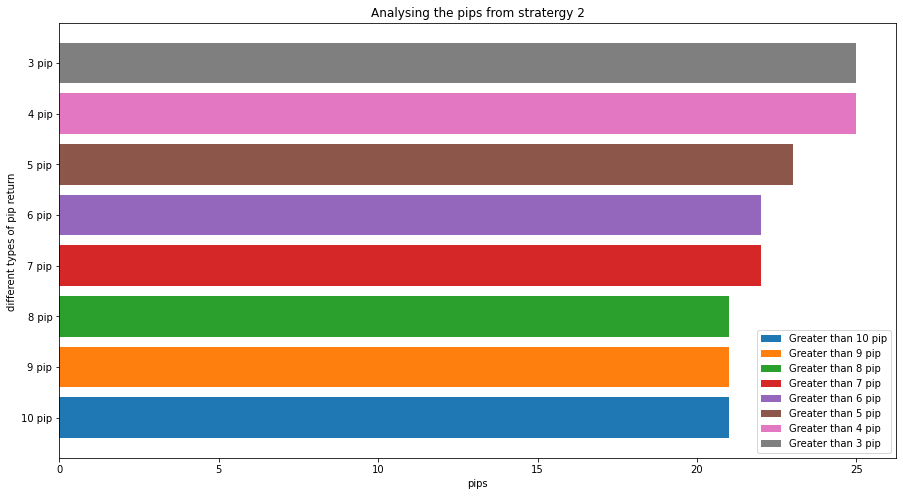

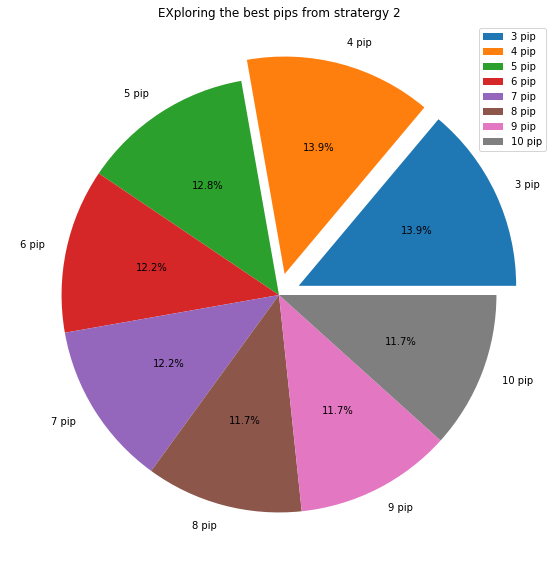

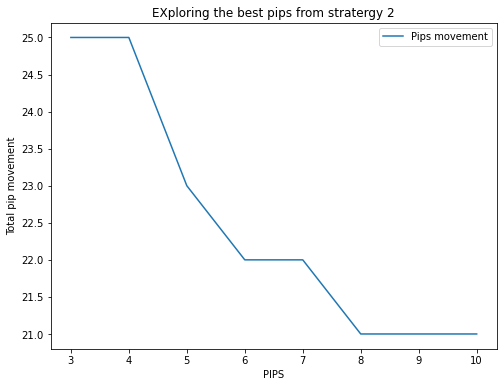

In [64]:
## PLOTTING THE PIPS MOVEMENT IN HORIZONTAL BAR PLOT.
plt.figure(figsize = (15,8))

plt.barh(y = ['10 pip'], width = _s2_10, label = 'Greater than 10 pip')
plt.barh(y = ['9 pip'], width = _s2_9, label = 'Greater than 9 pip')
plt.barh(y = ['8 pip'], width = _s2_8, label = 'Greater than 8 pip')
plt.barh(y = ['7 pip'], width = _s2_7, label = 'Greater than 7 pip')
plt.barh(y = ['6 pip'], width = _s2_6, label = 'Greater than 6 pip')
plt.barh(y = ['5 pip'], width = _s2_5, label = 'Greater than 5 pip')
plt.barh(y = ['4 pip'], width = _s2_4, label = 'Greater than 4 pip')
plt.barh(y = ['3 pip'], width = _s2_3, label = 'Greater than 3 pip')
plt.legend()
plt.title("Analysing the pips from stratergy 2")
plt.ylabel("different types of pip return ")
plt.xlabel("pips")
plt.show()

## PLOTTING THE PIE CHART
plt.figure(figsize = (10,10))
plt.pie(x = [_s2_3,_s2_4,_s2_5, _s2_6,_s2_7,_s2_8,_s2_9,_s2_10], labels = ['3 pip', '4 pip', '5 pip','6 pip', '7 pip', '8 pip', '9 pip', '10 pip'], explode = [0.1, 0.1,0, 0,0,0,0,0], autopct = '%1.1f%%')
plt.title("EXploring the best pips from stratergy 2")
plt.legend(loc = 'upper right')
plt.show()

## PLOTTING THE LINE PLOT
plt.figure(figsize = (8,6))
plt.plot([3,4,5,6,7,8,9,10], [_s2_3,_s2_4,_s2_5, _s2_6,_s2_7,_s2_8,_s2_9,_s2_10], label = "Pips movement")
plt.title("EXploring the best pips from stratergy 2")
plt.xlabel("PIPS")
plt.ylabel("Total pip movement")
plt.legend(loc = 'upper right')
plt.show()



**Analysis**
From the analysis we can see that there is 25 times during 16:30 to 19:30 it made more than 3 pip movement, and after 4 pip the total pip movement is decreasing, therefore from the analysis we can say that the maximum pips we can get is 4 pips before it starts to make lower pips.

Therefore placing the trade and 10 pips as take profit will loose our trade.

Therefore, if we want to trade here, we can expect atleast of 4 pips maximum, but you can go for 3 pip as a safer side.

## **Comparing the best stratergy to enter the trade with better return**

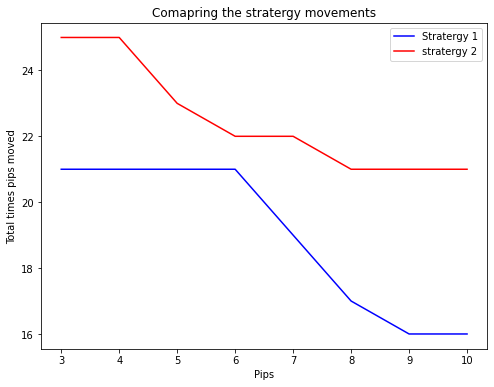

In [65]:
plt.figure(figsize = (8,6))
plt.plot([3,4,5,6,7,8,9,10], [_s1_3,_s1_4,_s1_5, _s1_6,_s1_7,_s1_8,_s1_9,_s1_10], color = 'blue', label = 'Stratergy 1')
plt.plot([3,4,5,6,7,8,9,10], [_s2_3,_s2_4,_s2_5, _s2_6,_s2_7,_s2_8,_s2_9,_s2_10], color = 'red', label = 'stratergy 2')
plt.title("Comapring the stratergy movements")
plt.xlabel("Pips")
plt.ylabel("Total times pips moved")
plt.legend()
plt.show()

In [66]:
tot = len(testpip)- _s1_3
tot2 = len(testpip) - _s2_3

In [67]:
# if we use 3 pip as take profit

import plotly.graph_objects as go
fig = go.Figure()
fig.add_traces([go.Bar(name = 'Stratergy 1 loose %', x = ["win and loose"], y = [tot], width = 0.1),
               go.Bar(name = 'Stratergy 1 win %', x = ["win and loose"], y = [_s1_3], width = 0.1)])

fig.add_traces([go.Bar(name = 'Stratergy 2 loose %', x = ["win and loose"], y = [tot2], width = 0.1),
               go.Bar(name = 'Stratergy 2 win %', x = ["win and loose"], y = [_s2_3], width = 0.1)])

fig.update_layout(barmode = 'stack', title = "Stacked bar plot of overall win and loose %", title_x = 0.45)
fig.show()


Overall, it is better to use 3 pip as take profit to be on safer side during 16:30 to 19:30.

# **Prediction Analysis**

In this section we will Analyse the prediction.

from the previous analysis that is profit analysis, we came to know that 3 pip was the better pips to trade at 16:30 to 19:30, therefore now we will buy when we find the time as 16:30 with 3 pips as take profit, and we will check if the analyse 3 pip would be better to trade or will it go for loosing trades.
This will also proove that at 16:30 to 19:30 there was a volatility and we canexpect atleast of 3pips.

**primary question for this section is**
Whether using this strategy the trades will be positive or negative at 16:30 to 19:30?

**Data Description**
 Here we will use the same data as volume analysis that is hourly data.

In [68]:
'''#### ACTUAL DATA TO PROCESSED DATA

def DayTimeProcessor(dataset):
  dataset['Local time'] = dataset['Local time'].apply(lambda x:x[:-13])                              # Removes the .000 GMT+0530 from data
  dataset['Local time'] = dataset['Local time'].apply(lambda x: dt.datetime.strptime(x, "%d.%m.%Y %H:%M:%S"))    # converts the data time in timestamp
  return (dataset)


def GetLagData(dataset,lags):
  for lag in lags:
    dataset['rtLag'+str(lag)] = np.where((dataset['Close'] - dataset['Close'].shift(lag))>0, 1,0)
  return (dataset)


def DataLabel(dataset):
  dataset['Signal'] = np.where(dataset['Open'] >= dataset['Close'], "BEAR", "BULL")
  return (dataset)


au_h = pd.read_csv("/content/AU_H.csv")

lagsVal = [1,2,3,4,5]
data = GetLagData(au_,lagsVal)

data = DataLabel(data)

data = data.set_index('Local time')

data.to_csv("AU_H_updated.csv")'''

'#### ACTUAL DATA TO PROCESSED DATA\n\ndef DayTimeProcessor(dataset):\n  dataset[\'Local time\'] = dataset[\'Local time\'].apply(lambda x:x[:-13])                              # Removes the .000 GMT+0530 from data\n  dataset[\'Local time\'] = dataset[\'Local time\'].apply(lambda x: dt.datetime.strptime(x, "%d.%m.%Y %H:%M:%S"))    # converts the data time in timestamp\n  return (dataset)\n\n\ndef GetLagData(dataset,lags):\n  for lag in lags:\n    dataset[\'rtLag\'+str(lag)] = np.where((dataset[\'Close\'] - dataset[\'Close\'].shift(lag))>0, 1,0)\n  return (dataset)\n\n\ndef DataLabel(dataset):\n  dataset[\'Signal\'] = np.where(dataset[\'Open\'] >= dataset[\'Close\'], "BEAR", "BULL")\n  return (dataset)\n\n\nau_h = pd.read_csv("/content/AU_H.csv")\n\nlagsVal = [1,2,3,4,5]\ndata = GetLagData(au_,lagsVal)\n\ndata = DataLabel(data)\n\ndata = data.set_index(\'Local time\')\n\ndata.to_csv("AU_H_updated.csv")'

In [69]:
### DATA PREPARATION

data = pd.read_csv("/content/AU_H.csv")

data['Signal'] = np.where(data['Signal'] == "BULL", 1,-1)

data_copy = data


### shape property of the dataset

print("The total rows of hourly data: ", data.shape[0])
print("Total features of the hourly data: ", data.shape[1])

data_copy.head()

The total rows of hourly data:  1537
Total features of the hourly data:  12


Local time     Open     High  ...  rtLag4  rtLag5  Signal
0  31.05.2020 23:30:00.000 GMT+0530  0.66650  0.66650  ...       0       0      -1
1  01.06.2020 00:30:00.000 GMT+0530  0.66650  0.66650  ...       0       0      -1
2  01.06.2020 01:30:00.000 GMT+0530  0.66650  0.66650  ...       0       0      -1
3  01.06.2020 02:30:00.000 GMT+0530  0.66570  0.66687  ...       0       0       1
4  01.06.2020 03:30:00.000 GMT+0530  0.66631  0.66635  ...       0       0      -1

[5 rows x 12 columns]

In [70]:
def GetTrain(ix):

## TRAIN ANS TEST SPLIT DATA USING INDEX FROM THE ForwardBacktester()
  from sklearn.model_selection import train_test_split
  
  '''Idea here is, if todays date is 4/5/2020 and 16:30:00 then we have only open value available which is not sufficient for my startergy, therefore I am using 15:30:00 of 4/5/2020
 as my test data, considering that 15:30:00 actions will react on 16:30:00, and training the data from first to 14:30:00 because 15:30:00 is our test data and we are predicting for 16:30:00'''
 
  X = data.iloc[:ix-2, 6:-1].values
  Y = data.iloc[:ix-2, -1:].values
  xtrain, xtest, ytrain, ytest= train_test_split(X, Y, train_size = 0.99, shuffle = False)

  Xtest = data.iloc[ix:ix+1, 6:-1].values

  return (xtrain, ytrain, Xtest)

In [71]:
def GetPrediction(xtrain, ytrain, xtest):

##WE ARE USING KNEIGHBORS AS 3
  clf = KNeighborsClassifier(n_neighbors=3)

##TRAINING AND FITTING THE DATA
  clf.fit(xtrain, ytrain)

##PREDICTING
  pred = clf.predict(xtest)
  
  return (pred)

In [72]:
def ForwardBacktester(start):

### STORING ALL THE VALUES
  predicted_ix = []
  take_profit = []
  total_trading_avail = 0
## LOOPING WITH RESPECT TO DATE TO MATCH THE START TIME, RANGE VALUES ARE USED AS INDEX 
  for dat, ix in zip(data_copy['Local time'], range(len(data_copy))):

## STRATERGY ENTRY TIME
    if (str(dat)[11:16] == start):

##TRAINING THE DATASET USING INDEX VALUES RANGE 
      Xtrain, Ytrain, Xtest  = GetTrain(ix)

##PREDICTING THE CLASS LABEL
      pred = np.squeeze(GetPrediction(Xtrain, Ytrain, Xtest))

      total_trading_avail += 1

##WE ONLY DOING THE BUY, THIS IS BUY ONLY STRATERGY ACCORDING TO OUR ANALYSIS
      if (pred == 1 ):
##STORING THE INDEX IF PREDICTED CLASS FOR 16:30 IS BUY, SO THAT WE CAN LATER EXTRACT THE DETAILS SUCH AS OPEN TIME, OPEN PRICE ETC.
        predicted_ix.append(ix)
##BEST PIP CALCULATED FROM PROFIT ANALYSIS IS 3PIP
        take_profit.append(data_copy['Open'].loc[ix] + 0.0003)     

  return (predicted_ix, take_profit, total_trading_avail)


In [73]:
predicted_ix, take_profit, total_days = ForwardBacktester("16:30")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was pa

In [74]:
def RetrieveData(predicted_list, h1, h2, h3):

# SAVE RESULTS IN THESE LISTS

  trade_open_date = []
  Open_1630 = []
  High_1630 = []
  High_1730 = []
  High_1830 = []
  High_1930 = []

  for dat in (predicted_list):  
# EXTRACTING THE DATA USING INDEX VALUE FORM THE PREDICTED_IX LIST AND SAVING THE RESULT
    trade_open_date.append(data_copy['Local time'][dat])
    Open_1630.append(data_copy['Open'][dat])
    High_1630.append(data_copy['High'][dat])
    if (dat != len(data_copy)):                                 
      High_1730.append(data_copy['High'][dat+h1])
      High_1830.append(data_copy['High'][dat+h2])
      High_1930.append(data_copy['High'][dat+h3])
    else:
      High_1730.append(data_copy['High'][dat])
      High_1830.append(data_copy['High'][dat])
      High_1930.append(data_copy['High'][dat])

  return (trade_open_date, Open_1630, High_1630, High_1730, High_1830, High_1930)

In [75]:
def BackTester(predicted_ix):
  
  ###EXTRACTING ALL DETAILS FOR TESTING OUR STRATERGY PROFIT

  OpenDate, Open1630, high1630, high1730, high1830, high1930 = RetrieveData(predicted_ix, 1,2,3)

  ###EMPTY DATAFRAME

  dataTest = pd.DataFrame()

  ###STROING ALL THE RESULTS

  dataTest['Open Day'] = OpenDate
  dataTest['Open@1630'] = Open1630
  dataTest['High@1630'] = high1630
  dataTest['High@1730'] = high1730
  dataTest['High@1830'] = high1830
  dataTest['High@1930'] = high1930
  dataTest['Predicted'] = take_profit

  ###TESTING IF MY PREDICTED VALUE IS BELOW THE HIGH VALUES, (NOTE: MY PREDICTED VALUE IS OPEN PRICE + 0.003), SINCE THE PREDICTED PRICE IS GREATER THAN OPEN AND BELOW HIGH(MAX RANGE) WE SAY ITS 1 ANS WE GET 3 PIP

  dataTest['Check True'] = np.where((dataTest['Predicted'] <= dataTest['High@1630']) | (dataTest['Predicted'] <= dataTest['High@1730']) | (dataTest['Predicted'] <= dataTest['High@1830']) | (dataTest['Predicted'] <= dataTest['High@1930']),1, -1)




################################# RESULT PRINT #########################################

  import time
  for OT, OP, PRED, CT in zip(dataTest['Open Day'], dataTest['Open@1630'], dataTest['Predicted'], dataTest['Check True']):
    if (CT == 1):
      sig = "BUY"
      day = OT[:10]
      print("-----------------------------------------------------------------------------------------------------------------|")
      print("{} | Trade is executed on {}| at 16:30| for Open price of {} |and take profit is {}".format(sig, day, OP, PRED))
      print("------------------------------------------------------------------------------------------------------------------|")
      time.sleep(1)

  print()
  print()
  print()

  print("Starting Balance: 100")
  print("Total Balnce after backtesitng {}". format(dataTest['Check True'].sum()*50))            # each pip 50AUD

  xp = []
  prof = 0
  for xprof in dataTest['Check True']:
    prof = prof+xprof
    xp.append(prof*50)

  print()
  print()
  print()

  plt.plot(xp, color = 'red', label = 'profit')
  plt.title("Profit from the stratergy")
  plt.xlabel("Total days")
  plt.ylabel("Profit in $(AUD)")
  plt.xticks(rotation = 30)
  plt.legend()
  plt.show()

  total_traded = len(dataTest)
  total_profit_days = len(dataTest.loc[dataTest['Check True']==1])
  total_lose_days = len(dataTest.loc[dataTest['Check True']==-1])
  plt.bar(x = ["Total available days"], height = total_days, label = "Total trading days available")
  plt.bar(x = ['total traded'], height = total_traded, label = "Total positions traded")
  plt.bar(x = ['total profit days'], height = total_profit_days, label = "Total profit trades")
  plt.bar(x = ['total lose days'], height = total_lose_days, label = 'Total loosing days')
  plt.title("Trdes summary")
  plt.ylabel("Total")
  plt.legend()
  plt.show()


  return (dataTest)


-----------------------------------------------------------------------------------------------------------------|
BUY | Trade is executed on 01.06.2020| at 16:30| for Open price of 0.67252 |and take profit is 0.67282
------------------------------------------------------------------------------------------------------------------|
-----------------------------------------------------------------------------------------------------------------|
BUY | Trade is executed on 04.06.2020| at 16:30| for Open price of 0.68945 |and take profit is 0.68975
------------------------------------------------------------------------------------------------------------------|
-----------------------------------------------------------------------------------------------------------------|
BUY | Trade is executed on 05.06.2020| at 16:30| for Open price of 0.69738 |and take profit is 0.69768
------------------------------------------------------------------------------------------------------------------

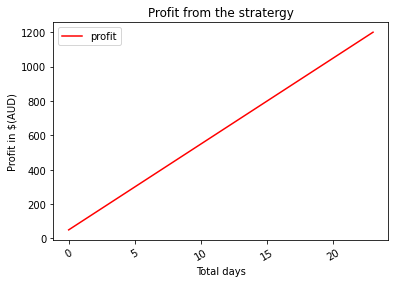

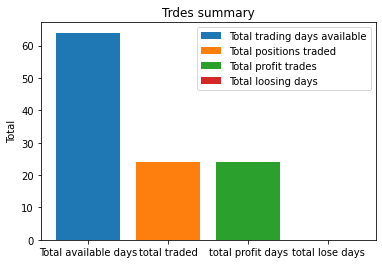

Open Day  Open@1630  ...  Predicted  Check True
0   01.06.2020 16:30:00.000 GMT+0530    0.67252  ...    0.67282           1
1   04.06.2020 16:30:00.000 GMT+0530    0.68945  ...    0.68975           1
2   05.06.2020 16:30:00.000 GMT+0530    0.69738  ...    0.69768           1
3   08.06.2020 16:30:00.000 GMT+0530    0.69758  ...    0.69788           1
4   09.06.2020 16:30:00.000 GMT+0530    0.69317  ...    0.69347           1
5   10.06.2020 16:30:00.000 GMT+0530    0.70010  ...    0.70040           1
6   15.06.2020 16:30:00.000 GMT+0530    0.67973  ...    0.68003           1
7   19.06.2020 16:30:00.000 GMT+0530    0.68695  ...    0.68725           1
8   22.06.2020 16:30:00.000 GMT+0530    0.68701  ...    0.68731           1
9   23.06.2020 16:30:00.000 GMT+0530    0.69330  ...    0.69360           1
10  30.06.2020 16:30:00.000 GMT+0530    0.68472  ...    0.68502           1
11  02.07.2020 16:30:00.000 GMT+0530    0.69210  ...    0.69240           1
12  06.07.2020 16:30:00.000 GMT+0530    0.69539  ...    0.69569           1
13  07.07.2020 16:30:00.000 GMT+0530    0.69290  ...    0.69320           1
14  08.07.2020 16:30:00.000 GMT+0530    0.69440  ...    0.69470           1
15  09.07.2020 16:30:00.000 GMT+0530    0.69764  ...    0.69794           1
16  13.07.2020 16:30:00.000 GMT+0530    0.69709  ...    0.69739           1
17  14.07.2020 16:30:00.000 GMT+0530    0.69552  ...    0.69582           1
18  15.07.2020 16:30:00.000 GMT+0530    0.70156  ...    0.70186           1
19  16.07.2020 16:30:00.000 GMT+0530    0.69751  ...    0.69781           1
20  20.07.2020 16:30:00.000 GMT+0530    0.69960  ...    0.69990           1
21  21.07.2020 16:30:00.000 GMT+0530    0.70762  ...    0.70792           1
22  22.07.2020 16:30:00.000 GMT+0530    0.71579  ...    0.71609           1
23  24.07.2020 16:30:00.000 GMT+0530    0.70666  ...    0.70696           1

[24 rows x 8 columns]

In [76]:
BackTester(predicted_ix)

Keep the Open Day as GMT format(original formt), we need see at what time zone we have tradead.
Based on the prediction analysis, we saw that there were 64 trades at 16:30 but the algorithm filtered those 64 trades to only profitable trades to trade, therefore there were 24 trades executed out of 64, and all the24 trades were positive and no loosing side.

We used takeprofit from the volume analysis as 3 pips from the open price it resulted all the trades to be on the positive.

From the start of the analysis,

* we found that AUD/USD was not performing better from 10 years.

* later, we analysed the correlation of AUD/USD with other major pairs in the world.

* In the volume analysis, we found the two srategy and we analysed the strategy to see if thats is working at 09:330 to 13:30 and 16:30 to 19:30.

* we found that, 3 pips was better to trade from profit analysis

* After that we found minimum pip we used ML to predict the class of a dataset, that is Bull/ Bear

<u>Name</u>:            Melory Elias Pereira

<u>Student ID</u>:      a1797905

<u>Assignment</u>:      Final project (Assesmnet-2)

<u>Project title</u>: **ANALYSIS AND FORECASTING OF AUD/USD WITH OTHER MAJOR FOREX PAIRS**